In [ ]:
# IMPORTAÇÕES BÁSICAS
# Importação de bibliotecas essenciais para análise de dados e visualização

import sys
from pathlib import Path

# Adicionar pasta raiz ao path para importar módulos customizados
sys.path.append('../../..')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import plotly.express as px        
import plotly.graph_objects as go  
import altair as alt               
from datetime import datetime

In [ ]:
# IMPORTAÇÃO DOS MÓDULOS CUSTOMIZADOS
# Importa funções personalizadas do projeto para carregamento, cores e visualizações

from lib.carregamento import (
    carregar_base_silver,
    carregar_base_gold_sp,
    carregar_base_agibank,
    carregar_base_setorial,
    carregar_base_filtrada,
    listar_arquivos_disponiveis,
    info_base
)

from lib.cores import (
    aplicar_tema_agibank,
    configurar_plotly,
    CORES_AGIBANK,
    PALETA_CATEGORICA,
    PALETA_AZUL,
    PALETA_VERDE,
    PLOTLY_COLORS,
    PLOTLY_PALETTE,
    PLOTLY_SCALE_AZUL,
    PLOTLY_SCALE_VERDE
)

from lib.visualizacoes import (
    grafico_barras,
    grafico_linha,
    grafico_pizza,
    grafico_boxplot,
    grafico_heatmap,
    grafico_distribuicao,
    grafico_comparativo_barras
)

Tema Agibank aplicado - Tamanho: medio


In [ ]:
# CONFIGURAÇÕES GERAIS
# Define configurações de warnings, reprodutibilidade e exibição de dados

# Ignorar alertas desnecessários
warnings.filterwarnings('ignore')

# Configurações de reprodutibilidade
np.random.seed(42)

# Configurações de exibição
np.set_printoptions(
    precision=2,
    suppress=True,
    linewidth=120,
    edgeitems=5,
    threshold=1000
)

# Configurações de exibição
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', '{:.2f}'.format)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', 50)
pd.set_option('mode.use_inf_as_na', True)

In [ ]:
# CONFIGURAÇÕES VISUAIS
# Aplica temas e configurações para gráficos (Matplotlib, Seaborn, Plotly, Altair)

# Aplicar temas visuais Agibank
aplicar_tema_agibank('grande')
configurar_plotly()

# Configurações do Altair
alt.renderers.enable('default')
alt.data_transformers.disable_max_rows()

# Configurações para gráficos inline no Jupyter
try:
    get_ipython().run_line_magic('matplotlib', 'inline')
except:
    pass

# Configurações de salvamento de figuras
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['savefig.bbox'] = 'tight'

Tema Agibank aplicado - Tamanho: grande
Tema Agibank aplicado ao Plotly


In [ ]:
# DEFINIÇÃO DE CONSTANTES E CAMINHOS
# Define ano de análise, janelas temporais e caminhos do projeto

# Definição de constantes temporais
ANO_ANALISE = np.int16(2025)
JANELA_ANOS = np.array([ANO_ANALISE - 1, ANO_ANALISE], dtype=np.int16)
DATAS_REFERENCIA = np.arange(f'{ANO_ANALISE}-01', f'{ANO_ANALISE+1}-01', dtype='datetime64[M]')

# Definição de caminhos do projeto
RAIZ_PROJETO = Path.cwd()
CAMINHO_OUTPUT = RAIZ_PROJETO / 'output'
CAMINHO_OUTPUT.mkdir(exist_ok=True)
print(f"Ano de análise: {ANO_ANALISE}")
print(f"Janela temporal: {JANELA_ANOS}")
print(f"Pasta de output: {CAMINHO_OUTPUT}")

Ano de análise: 2025
Janela temporal: [2024 2025]
Pasta de output: c:\Users\caroline.coutinho\projeto_mediacao_bancaria\analises\silver\notebooks_silver\output


In [ ]:
# RESUMO DO AMBIENTE
# Exibe informações sobre versões das bibliotecas e configurações aplicadas

print("=" * 80)
print("AMBIENTE CONFIGURADO COM SUCESSO")
print("=" * 80)

# Obter versão do Plotly com tratamento de erro
try:
    plotly_v = plotly.__version__
except:
    plotly_v = "Instalado"

# Estruturar metadados das bibliotecas
info_libs = np.array([
    ['Pandas', pd.__version__],
    ['NumPy', np.__version__],
    ['Matplotlib', plt.matplotlib.__version__],
    ['Seaborn', sns.__version__],
    ['Plotly', plotly_v],
    ['Altair', alt.__version__],
    ['Python', sys.version.split()[0]]
])

print(f"\nVersões das bibliotecas:")
for lib, versao in info_libs:
    print(f"  {lib}: {versao}")

print(f"\nConfigurações do projeto:")
print(f"  Ano de análise: {ANO_ANALISE}")
print(f"  Pasta de output: {CAMINHO_OUTPUT}")
print(f"  Path atual: {RAIZ_PROJETO}")

# Converter paletas para NumPy
paleta_mpl_np = np.array(PALETA_CATEGORICA)
paleta_plotly_np = np.array(PLOTLY_PALETTE)

print(f"\nTema visual:")
print(f"  Tema Agibank aplicado (tamanho: grande)")
print(f"  Paleta Matplotlib: {paleta_mpl_np.size} cores")
print(f"  Paleta Plotly: {paleta_plotly_np.size} cores")

print("=" * 80)

AMBIENTE CONFIGURADO COM SUCESSO

Versões das bibliotecas:
  Pandas: 2.3.3
  NumPy: 2.3.5
  Matplotlib: 3.10.7
  Seaborn: 0.13.2
  Plotly: Instalado
  Altair: 6.0.0
  Python: 3.13.5

Configurações do projeto:
  Ano de análise: 2025
  Pasta de output: c:\Users\caroline.coutinho\projeto_mediacao_bancaria\analises\silver\notebooks_silver\output
  Path atual: c:\Users\caroline.coutinho\projeto_mediacao_bancaria\analises\silver\notebooks_silver

Tema visual:
  Tema Agibank aplicado (tamanho: grande)
  Paleta Matplotlib: 6 cores
  Paleta Plotly: 6 cores


In [ ]:
# CARREGAMENTO DA BASE SETORIAL
# Carrega o arquivo sp_setorial_segments_v1.csv

print("=" * 80)
print("CARREGANDO BASE SETORIAL")
print("=" * 80 + "\n")

df_setorial = carregar_base_setorial()

CARREGANDO BASE SETORIAL

Carregando base setorial de: c:\Users\caroline.coutinho\projeto_mediacao_bancaria\analises\silver\notebooks_silver\..\..\..\data\gold\sp_setorial_segments_v1.csv
Base setorial carregada com sucesso!
Registros: 45
Colunas: 3


In [ ]:
# CARREGAMENTO DA BASE SP COMPLETO
# Carrega o arquivo sp_consumidor_completo_v1.csv

print("=" * 80)
print("CARREGANDO BASE SP COMPLETO")
print("=" * 80 + "\n")

df_sp_completo = carregar_base_gold_sp()

CARREGANDO BASE SP COMPLETO

Carregando SP (Gold) de: c:\Users\caroline.coutinho\projeto_mediacao_bancaria\analises\silver\notebooks_silver\..\..\..\data\gold\sp_consumidor_completo_v1.csv
Separador detectado: ';'
Tentativa 1...
✅ Base SP carregada com sucesso (tentativa 1)!
Registros: 649,557
Colunas: 32


In [18]:
# INVESTIGAÇÃO DAS CIDADES DE SÃO PAULO
# Antes de classificar Capital vs Interior, vamos entender os dados

print("=" * 80)
print("INVESTIGAÇÃO: CIDADES DO ESTADO DE SÃO PAULO")
print("=" * 80)

arr_cidade_original = df_sp_completo['cidade'].to_numpy()
arr_cidade_upper = df_sp_completo['cidade'].str.upper().to_numpy()

# Contar cidades únicas
cidades_unicas, contagens = np.unique(arr_cidade_upper, return_counts=True)

# Ordenar do maior para o menor
idx_ordenado = np.argsort(contagens)[::-1]
cidades_ordenadas = cidades_unicas[idx_ordenado]
contagens_ordenadas = contagens[idx_ordenado]

print(f"\nESTATÍSTICAS GERAIS:")
print(f"Total de registros: {len(arr_cidade_original):,}")
print(f"Cidades únicas: {len(cidades_unicas):,}")

# TOP 20 cidades
print(f"\nTOP 20 CIDADES COM MAIS RECLAMAÇÕES:")
print("-" * 80)

df_top20 = pd.DataFrame({
    'Cidade': cidades_ordenadas[:20],
    'Reclamações': contagens_ordenadas[:20],
    '% do Total': (contagens_ordenadas[:20] / len(arr_cidade_original)) * 100
})

display(df_top20.style.format({
    'Reclamações': '{:,}',
    '% do Total': '{:.2f}%'
}))

# Verificar variações de "São Paulo"
print(f"\nVERIFICANDO VARIAÇÕES DE 'SÃO PAULO':")
print("-" * 80)

variacoes_sp = [cidade for cidade in cidades_unicas if 'SAO PAULO' in cidade or 'SÃO PAULO' in cidade]
for variacao in variacoes_sp:
    qtd = contagens[cidades_unicas == variacao][0]
    print(f"  '{variacao}': {qtd:,} registros")

# Percentual da cidade de São Paulo
sp_capital = contagens_ordenadas[0] if cidades_ordenadas[0] in ['SÃO PAULO', 'SAO PAULO'] else 0
pct_capital = (sp_capital / len(arr_cidade_original)) * 100

print(f"\nCONCENTRAÇÃO:")
print(f"São Paulo (capital): {sp_capital:,} ({pct_capital:.1f}%)")
print(f"Resto do estado: {len(arr_cidade_original) - sp_capital:,} ({100 - pct_capital:.1f}%)")

INVESTIGAÇÃO: CIDADES DO ESTADO DE SÃO PAULO

ESTATÍSTICAS GERAIS:
Total de registros: 649,557
Cidades únicas: 696

TOP 20 CIDADES COM MAIS RECLAMAÇÕES:
--------------------------------------------------------------------------------


,Cidade,Reclamações,% do Total
0,SÃO PAULO,"227,446",35.02%
1,GUARULHOS,"20,522",3.16%
2,CAMPINAS,"18,330",2.82%
3,SOROCABA,"14,270",2.20%
4,OSASCO,"13,420",2.07%
5,SÃO BERNARDO DO CAMPO,"13,229",2.04%
6,SANTO ANDRÉ,"12,996",2.00%
7,RIBEIRÃO PRETO,"11,769",1.81%
8,SÃO JOSÉ DOS CAMPOS,"11,415",1.76%
9,JUNDIAÍ,"8,714",1.34%



VERIFICANDO VARIAÇÕES DE 'SÃO PAULO':
--------------------------------------------------------------------------------
  'SÃO PAULO': 227,446 registros

CONCENTRAÇÃO:
São Paulo (capital): 227,446 (35.0%)
Resto do estado: 422,111 (65.0%)


In [19]:
# PREPARAÇÃO DOS DADOS PARA ANÁLISE SP
# Cria variáveis auxiliares e filtros necessários para as 15 análises usando NumPy

print("=" * 80)
print("PREPARAÇÃO DOS DADOS - ANÁLISE SÃO PAULO")
print("=" * 80)

# Converter colunas principais para processamento eficiente
arr_cidade = df_sp_completo['cidade'].str.upper().to_numpy()
arr_nota = df_sp_completo['nota_do_consumidor'].to_numpy()
arr_tempo = df_sp_completo['tempo_resposta'].to_numpy()
arr_mes = df_sp_completo['mes_abertura'].to_numpy()
arr_avaliacao = df_sp_completo['avaliacao_reclamacao'].to_numpy()

# Criar flags usando operações
eh_capital = arr_cidade == 'SÃO PAULO'
eh_campinas = arr_cidade == 'CAMPINAS'
eh_interior = ~eh_capital

# Adicionar flags ao DataFrame
df_sp_completo['eh_capital'] = eh_capital
df_sp_completo['eh_campinas'] = eh_campinas
df_sp_completo['eh_interior'] = eh_interior

# Categorização de notas
categoria_nota = np.select(
    [arr_nota <= 2, arr_nota == 3, arr_nota >= 4],
    ['Insatisfeito (≤2)', 'Neutro (3)', 'Satisfeito (≥4)'],
    default='Sem nota'
)
df_sp_completo['categoria_nota'] = categoria_nota

# Categorização de tempo
categoria_tempo = np.select(
    [
        arr_tempo <= 1,
        (arr_tempo > 1) & (arr_tempo <= 3),
        (arr_tempo > 3) & (arr_tempo <= 7),
        (arr_tempo > 7) & (arr_tempo <= 10),
        arr_tempo > 10
    ],
    ['0-1 dia', '1-3 dias', '3-7 dias', '7-10 dias', '>10 dias'],
    default='Não informado'
)
df_sp_completo['categoria_tempo'] = categoria_tempo

# Flag de resposta no prazo
no_prazo = arr_tempo <= 10
df_sp_completo['no_prazo'] = no_prazo

# Estatísticas básicas 
total_registros = len(arr_cidade)
total_capital = np.sum(eh_capital)
total_interior = np.sum(eh_interior)
total_campinas = np.sum(eh_campinas)

pct_capital = (total_capital / total_registros) * 100
pct_interior = (total_interior / total_registros) * 100
pct_campinas = (total_campinas / total_registros) * 100

print(f"\nDISTRIBUIÇÃO GEOGRÁFICA:")
print(f"Total de registros SP: {total_registros:,}")
print(f"Capital (São Paulo): {total_capital:,} ({pct_capital:.1f}%)")
print(f"Interior: {total_interior:,} ({pct_interior:.1f}%)")
print(f"Campinas: {total_campinas:,} ({pct_campinas:.1f}%)")

PREPARAÇÃO DOS DADOS - ANÁLISE SÃO PAULO

DISTRIBUIÇÃO GEOGRÁFICA:
Total de registros SP: 649,557
Capital (São Paulo): 227,446 (35.0%)
Interior: 422,111 (65.0%)
Campinas: 18,330 (2.8%)


In [23]:
# ANÁLISE: Evolução Temporal do Mercado Financeiro de São Paulo
# Objetivo: Entender o volume de reclamações ao longo dos meses e identificar padrões de crescimento

print("=" * 80)
print("TAMANHO DO MERCADO FINANCEIRO DE SÃO PAULO")
print("=" * 80)

# Agrupa reclamações por mês e calcula estatísticas temporais
meses_unicos, contagem_por_mes = np.unique(arr_mes, return_counts=True)

# Ordena cronologicamente para análise de tendência
idx_ordenado = np.argsort(meses_unicos)
meses_ordenados = meses_unicos[idx_ordenado]
contagens_ordenadas = contagem_por_mes[idx_ordenado]

# Calcula taxa de crescimento entre primeiro e último mês
if len(contagens_ordenadas) > 1:
    crescimento = ((contagens_ordenadas[-1] / contagens_ordenadas[0]) - 1) * 100
else:
    crescimento = 0.0

# Calcula indicadores estatísticos de dispersão e tendência central
media_mensal = np.mean(contagens_ordenadas)
mediana_mensal = np.median(contagens_ordenadas)
desvio_mensal = np.std(contagens_ordenadas)
mes_max = meses_ordenados[np.argmax(contagens_ordenadas)]
reclamacoes_max = np.max(contagens_ordenadas)
mes_min = meses_ordenados[np.argmin(contagens_ordenadas)]
reclamacoes_min = np.min(contagens_ordenadas)

print(f"\nVOLUMETRIA ESTADO DE SÃO PAULO:")
print(f"Total de reclamações no estado: {total_registros:,}")
print(f"Média mensal: {media_mensal:,.0f}")
print(f"Mediana mensal: {mediana_mensal:,.0f}")
print(f"Desvio padrão: {desvio_mensal:,.0f}")
print(f"\nMês com MAIS reclamações: {mes_max:.0f} ({reclamacoes_max:,})")
print(f"Mês com MENOS reclamações: {mes_min:.0f} ({reclamacoes_min:,})")
print(f"Crescimento no período: {crescimento:+.1f}%")

# Monta tabela consolidada para visualização com formatação
df_evolucao = pd.DataFrame({
    'Mês': meses_ordenados.astype(int),
    'Reclamações': contagens_ordenadas,
    'Variação %': np.concatenate([[0], np.diff(contagens_ordenadas) / contagens_ordenadas[:-1] * 100])
})

# Define o mês como index
df_evolucao = df_evolucao.set_index('Mês')

# Aplica formatação e gradiente de cores
display(
    df_evolucao.style
    .format({
        'Reclamações': '{:,.0f}',
        'Variação %': '{:+.1f}%'
    })
    .background_gradient(cmap='Blues', subset=['Reclamações'])
    .background_gradient(cmap='RdYlGn', subset=['Variação %'], vmin=-20, vmax=20)
    .set_caption('Evolução Mensal de Reclamações - Estado de São Paulo')
)

TAMANHO DO MERCADO FINANCEIRO DE SÃO PAULO

VOLUMETRIA ESTADO DE SÃO PAULO:
Total de reclamações no estado: 649,557
Média mensal: 54,130
Mediana mensal: 50,476
Desvio padrão: 12,063

Mês com MAIS reclamações: 11 (73,182)
Mês com MENOS reclamações: 2 (39,040)
Crescimento no período: -16.1%


,Reclamações,Variação %
Mês,,
1,"47,985",+0.0%
2,"39,040",-18.6%
3,"40,822",+4.6%
4,"44,475",+8.9%
5,"49,092",+10.4%
6,"51,859",+5.6%
7,"57,787",+11.4%
8,"67,794",+17.3%
9,"67,235",-0.8%


GRÁFICO: EVOLUÇÃO TEMPORAL DAS RECLAMAÇÕES


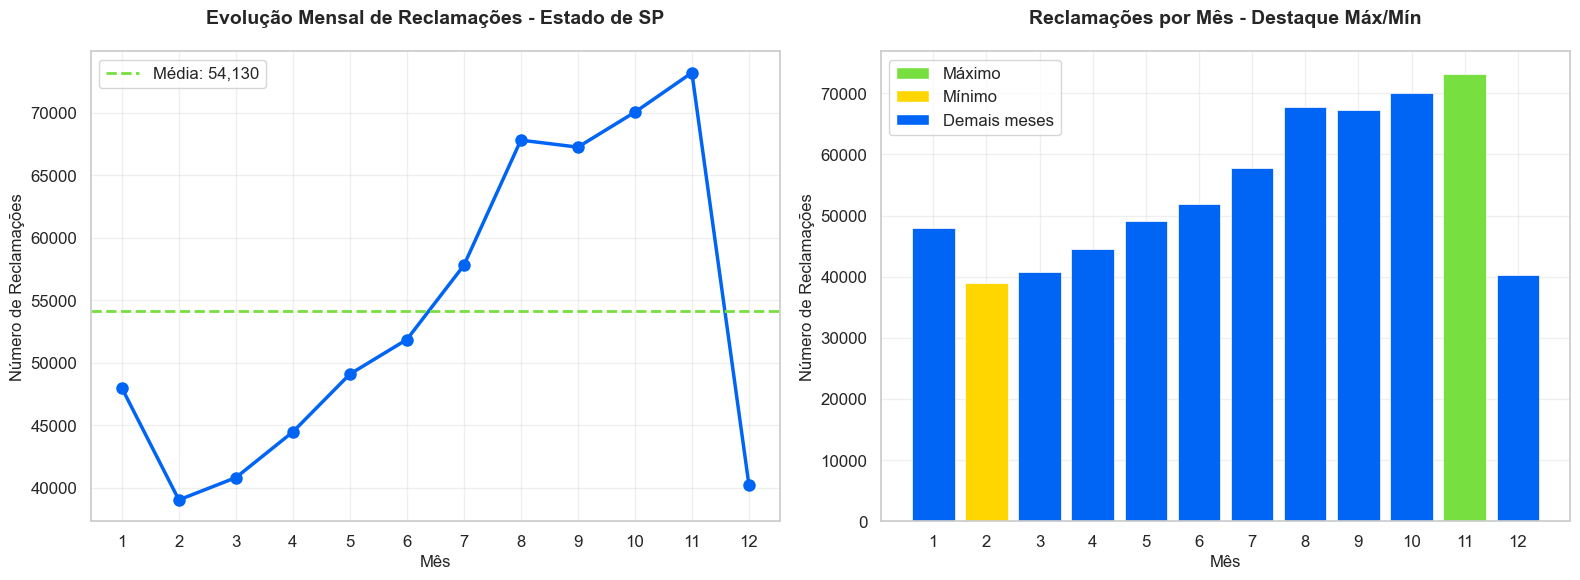

In [24]:
# VISUALIZAÇÃO: Gráfico de Evolução Temporal
# Objetivo: Apresentar visualmente a tendência mensal de reclamações em São Paulo

print("=" * 80)
print("GRÁFICO: EVOLUÇÃO TEMPORAL DAS RECLAMAÇÕES")
print("=" * 80)

# Criar figura com dois subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico 1: Linha temporal com marcadores
ax1.plot(meses_ordenados, contagens_ordenadas, 
         marker='o', linewidth=2.5, markersize=8, 
         color=CORES_AGIBANK['azul_principal'])
ax1.set_title('Evolução Mensal de Reclamações - Estado de SP', 
              fontsize=14, fontweight='bold', pad=20)
ax1.set_xlabel('Mês', fontsize=12)
ax1.set_ylabel('Número de Reclamações', fontsize=12)
ax1.grid(True, alpha=0.3)
ax1.set_xticks(meses_ordenados)

# Adiciona linha de média
ax1.axhline(y=media_mensal, color=CORES_AGIBANK['verde'], 
            linestyle='--', linewidth=2, label=f'Média: {media_mensal:,.0f}')
ax1.legend()

# Gráfico 2: Barras com destaque para máximos e mínimos
cores_barras = [CORES_AGIBANK['verde'] if mes == mes_max 
                else CORES_AGIBANK['amarelo'] if mes == mes_min 
                else CORES_AGIBANK['azul_principal'] 
                for mes in meses_ordenados]

ax2.bar(meses_ordenados, contagens_ordenadas, color=cores_barras, edgecolor='white', linewidth=0.5)
ax2.set_title('Reclamações por Mês - Destaque Máx/Mín', 
              fontsize=14, fontweight='bold', pad=20)
ax2.set_xlabel('Mês', fontsize=12)
ax2.set_ylabel('Número de Reclamações', fontsize=12)
ax2.grid(True, alpha=0.3, axis='y')
ax2.set_xticks(meses_ordenados)

# Legenda personalizada
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor=CORES_AGIBANK['verde'], label='Máximo'),
    Patch(facecolor=CORES_AGIBANK['amarelo'], label='Mínimo'),
    Patch(facecolor=CORES_AGIBANK['azul_principal'], label='Demais meses')
]
ax2.legend(handles=legend_elements)

plt.tight_layout()
plt.show()

In [26]:
# INVESTIGAÇÃO: Problemas na coluna 'sexo'
# Objetivo: Identificar valores ausentes, tipos de dados e inconsistências antes de tratar

print("=" * 80)
print("INVESTIGAÇÃO: COLUNA 'SEXO'")
print("=" * 80)

# Informações básicas da coluna
print(f"\nINFORMAÇÕES GERAIS:")
print(f"Total de registros: {len(df_sp_completo):,}")
print(f"Tipo de dado da coluna: {df_sp_completo['sexo'].dtype}")

# Conta valores nulos
total_nulos = df_sp_completo['sexo'].isna().sum()
pct_nulos = (total_nulos / len(df_sp_completo)) * 100

print(f"\nVALORES AUSENTES:")
print(f"Nulos/NaN: {total_nulos:,} ({pct_nulos:.2f}%)")

# Conta valores únicos (incluindo NaN)
print(f"\nVALORES ÚNICOS:")
print(f"Quantidade de valores únicos: {df_sp_completo['sexo'].nunique()}")

# Mostra contagem de cada valor (incluindo NaN)
print(f"\nDISTRIBUIÇÃO DE VALORES:")
print("-" * 80)
contagem_valores = df_sp_completo['sexo'].value_counts(dropna=False)
print(contagem_valores)

# Verifica tipos de dados dentro da coluna
print(f"\nTIPOS DE DADOS ENCONTRADOS:")
print("-" * 80)
tipos_encontrados = df_sp_completo['sexo'].apply(type).value_counts()
print(tipos_encontrados)

# Mostra alguns exemplos de cada tipo
print(f"\nEXEMPLOS DE VALORES:")
print("-" * 80)
amostra = df_sp_completo['sexo'].head(20)
for i, valor in enumerate(amostra):
    print(f"{i}: {valor} (tipo: {type(valor).__name__})")

INVESTIGAÇÃO: COLUNA 'SEXO'

INFORMAÇÕES GERAIS:
Total de registros: 649,557
Tipo de dado da coluna: object

VALORES AUSENTES:
Nulos/NaN: 8 (0.00%)

VALORES ÚNICOS:
Quantidade de valores únicos: 3

DISTRIBUIÇÃO DE VALORES:
--------------------------------------------------------------------------------
sexo
M      351000
F      298034
O         515
NaN         8
Name: count, dtype: int64

TIPOS DE DADOS ENCONTRADOS:
--------------------------------------------------------------------------------
sexo
<class 'str'>      649549
<class 'float'>         8
Name: count, dtype: int64

EXEMPLOS DE VALORES:
--------------------------------------------------------------------------------
0: M (tipo: str)
1: F (tipo: str)
2: F (tipo: str)
3: M (tipo: str)
4: M (tipo: str)
5: M (tipo: str)
6: M (tipo: str)
7: F (tipo: str)
8: F (tipo: str)
9: F (tipo: str)
10: F (tipo: str)
11: F (tipo: str)
12: M (tipo: str)
13: M (tipo: str)
14: F (tipo: str)
15: F (tipo: str)
16: F (tipo: str)
17: M (tipo: str)

In [27]:
# ANÁLISE: Perfil Demográfico do Consumidor Paulista
# Objetivo: Identificar distribuição por gênero
# Tratamento: 8 valores NaN (0.00%) serão classificados como 'Não Informado'

print("=" * 80)
print("PERFIL DEMOGRÁFICO: GÊNERO DO CONSUMIDOR PAULISTA")
print("=" * 80)

# Extrai array de gênero e trata os 8 valores ausentes
arr_sexo = df_sp_completo['sexo'].fillna('Não Informado').astype(str).to_numpy()

# Conta distribuição por gênero
generos_unicos, contagem_genero = np.unique(arr_sexo, return_counts=True)

# Calcula percentuais
pct_genero = (contagem_genero / len(arr_sexo)) * 100

# Ordena do maior para o menor
idx_ord_genero = np.argsort(contagem_genero)[::-1]
generos_ordenados = generos_unicos[idx_ord_genero]
contagens_ordenadas = contagem_genero[idx_ord_genero]
pct_ordenados = pct_genero[idx_ord_genero]

print(f"\nDISTRIBUIÇÃO POR GÊNERO:")
print("-" * 80)

# Monta DataFrame para visualização
df_genero = pd.DataFrame({
    'Gênero': generos_ordenados,
    'Reclamações': contagens_ordenadas,
    '% do Total': pct_ordenados
})

# Define gênero como index
df_genero = df_genero.set_index('Gênero')

# Exibe com formatação e cores
display(
    df_genero.style
    .format({
        'Reclamações': '{:,.0f}',
        '% do Total': '{:.2f}%'
    })
    .background_gradient(cmap='Blues', subset=['Reclamações'])
    .background_gradient(cmap='Greens', subset=['% do Total'])
    .set_caption('Distribuição de Reclamações por Gênero - Estado de São Paulo')
)

# Identifica gênero predominante (excluindo "Não Informado")
generos_validos = generos_ordenados[generos_ordenados != 'Não Informado']
if len(generos_validos) > 0:
    genero_predominante = generos_validos[0]
    idx_predominante = np.where(generos_ordenados == genero_predominante)[0][0]
    pct_predominante = pct_ordenados[idx_predominante]
    
    print(f"\nINSIGHT:")
    print(f"Gênero predominante: {genero_predominante} ({pct_predominante:.1f}%)")

PERFIL DEMOGRÁFICO: GÊNERO DO CONSUMIDOR PAULISTA

DISTRIBUIÇÃO POR GÊNERO:
--------------------------------------------------------------------------------


,Reclamações,% do Total
Gênero,,
M,"351,000",54.04%
F,"298,034",45.88%
O,515,0.08%
Não Informado,8,0.00%



INSIGHT:
Gênero predominante: M (54.0%)


In [29]:
# ANÁLISE: Distribuição por Faixa Etária
# Objetivo: Identificar o perfil etário dos consumidores paulistas

print("=" * 80)
print("PERFIL DEMOGRÁFICO: FAIXA ETÁRIA DO CONSUMIDOR PAULISTA")
print("=" * 80)

# Extrai array de faixa etária e trata valores ausentes
arr_faixa_etaria = df_sp_completo['faixa_etaria'].fillna('Não Informado').astype(str).to_numpy()

# Conta distribuição por faixa etária
faixas_unicas, contagem_faixas = np.unique(arr_faixa_etaria, return_counts=True)

# Calcula percentuais
pct_faixas = (contagem_faixas / len(arr_faixa_etaria)) * 100

# Ordena do maior para o menor
idx_ord_faixas = np.argsort(contagem_faixas)[::-1]
faixas_ordenadas = faixas_unicas[idx_ord_faixas]
contagens_faixas_ord = contagem_faixas[idx_ord_faixas]
pct_faixas_ord = pct_faixas[idx_ord_faixas]

print(f"\nDISTRIBUIÇÃO POR FAIXA ETÁRIA:")
print("-" * 80)

# Monta DataFrame para visualização
df_faixa_etaria = pd.DataFrame({
    'Faixa Etária': faixas_ordenadas,
    'Reclamações': contagens_faixas_ord,
    '% do Total': pct_faixas_ord
})

# Define faixa etária como index
df_faixa_etaria = df_faixa_etaria.set_index('Faixa Etária')

# Exibe com formatação e cores
display(
    df_faixa_etaria.style
    .format({
        'Reclamações': '{:,.0f}',
        '% do Total': '{:.2f}%'
    })
    .background_gradient(cmap='Blues', subset=['Reclamações'])
    .background_gradient(cmap='Oranges', subset=['% do Total'])
    .set_caption('Distribuição de Reclamações por Faixa Etária - Estado de São Paulo')
)

# Identifica faixa etária predominante
faixas_validas = faixas_ordenadas[faixas_ordenadas != 'Não Informado']
if len(faixas_validas) > 0:
    faixa_predominante = faixas_validas[0]
    idx_predominante = np.where(faixas_ordenadas == faixa_predominante)[0][0]
    pct_predominante = pct_faixas_ord[idx_predominante]
    
    print(f"\nINSIGHT:")
    print(f"Faixa etária predominante: {faixa_predominante} ({pct_predominante:.1f}%)")

PERFIL DEMOGRÁFICO: FAIXA ETÁRIA DO CONSUMIDOR PAULISTA

DISTRIBUIÇÃO POR FAIXA ETÁRIA:
--------------------------------------------------------------------------------


,Reclamações,% do Total
Faixa Etária,,
entre 31 a 40 anos,"213,440",32.86%
entre 41 a 50 anos,"158,354",24.38%
entre 21 a 30 anos,"143,990",22.17%
entre 51 a 60 anos,"69,948",10.77%
entre 61 a 70 anos,"37,281",5.74%
mais de 70 anos,"14,563",2.24%
até 20 anos,"11,981",1.84%



INSIGHT:
Faixa etária predominante: entre 31 a 40 anos (32.9%)


GRÁFICO: DISTRIBUIÇÃO POR FAIXA ETÁRIA


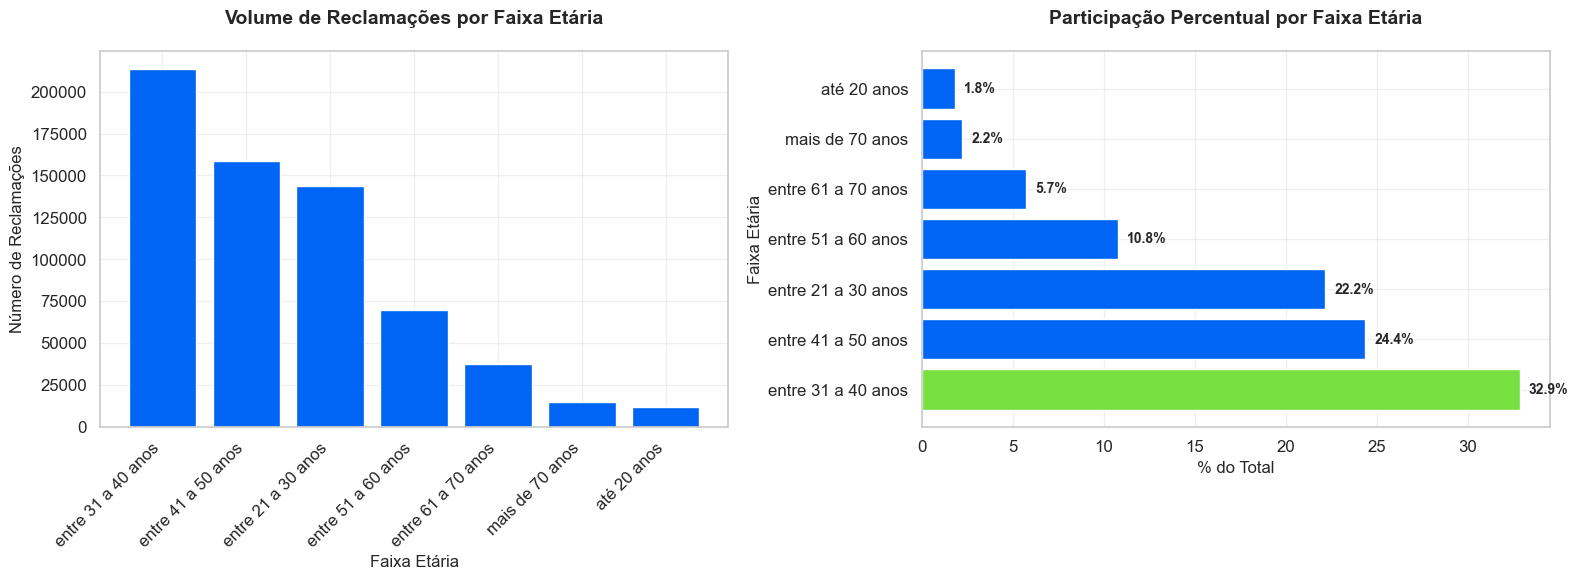

In [30]:
# VISUALIZAÇÃO: Distribuição por Faixa Etária
# Objetivo: Representar graficamente o perfil etário dos consumidores paulistas

print("=" * 80)
print("GRÁFICO: DISTRIBUIÇÃO POR FAIXA ETÁRIA")
print("=" * 80)

# Filtrar apenas faixas válidas (excluir "Não Informado")
mask_validos = faixas_ordenadas != 'Não Informado'
faixas_grafico = faixas_ordenadas[mask_validos]
contagens_faixas_grafico = contagens_faixas_ord[mask_validos]
pct_faixas_grafico = pct_faixas_ord[mask_validos]

# Criar figura com dois subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico 1: Barras verticais
ax1.bar(range(len(faixas_grafico)), contagens_faixas_grafico, 
        color=CORES_AGIBANK['azul_principal'], edgecolor='white', linewidth=1)
ax1.set_title('Volume de Reclamações por Faixa Etária', fontsize=14, fontweight='bold', pad=20)
ax1.set_xlabel('Faixa Etária', fontsize=12)
ax1.set_ylabel('Número de Reclamações', fontsize=12)
ax1.set_xticks(range(len(faixas_grafico)))
ax1.set_xticklabels(faixas_grafico, rotation=45, ha='right')
ax1.grid(True, alpha=0.3, axis='y')

# Gráfico 2: Barras horizontais com percentuais
cores_barras = [CORES_AGIBANK['verde'] if i == 0 else CORES_AGIBANK['azul_principal'] 
                for i in range(len(faixas_grafico))]

ax2.barh(range(len(faixas_grafico)), pct_faixas_grafico, 
         color=cores_barras, edgecolor='white', linewidth=1)
ax2.set_title('Participação Percentual por Faixa Etária', fontsize=14, fontweight='bold', pad=20)
ax2.set_xlabel('% do Total', fontsize=12)
ax2.set_ylabel('Faixa Etária', fontsize=12)
ax2.set_yticks(range(len(faixas_grafico)))
ax2.set_yticklabels(faixas_grafico)
ax2.grid(True, alpha=0.3, axis='x')

# Adiciona valores percentuais nas barras
for i, pct in enumerate(pct_faixas_grafico):
    ax2.text(pct + 0.5, i, f'{pct:.1f}%', va='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

In [31]:
# ANÁLISE: Cruzamento Gênero x Faixa Etária
# Objetivo: Identificar o perfil combinado de gênero e idade dos consumidores paulistas

print("=" * 80)
print("PERFIL DEMOGRÁFICO: CRUZAMENTO GÊNERO X FAIXA ETÁRIA")
print("=" * 80)

# Criar arrays limpos (sem valores ausentes)
arr_sexo_limpo = df_sp_completo['sexo'].fillna('Não Informado').astype(str).to_numpy()
arr_faixa_limpa = df_sp_completo['faixa_etaria'].fillna('Não Informado').astype(str).to_numpy()

# Criar tabela de contingência usando pandas (mais eficiente para cruzamento)
tabela_cruzada = pd.crosstab(
    arr_faixa_limpa, 
    arr_sexo_limpo, 
    margins=True, 
    margins_name='TOTAL'
)

# Calcular percentuais por linha (% dentro de cada faixa etária)
tabela_pct = pd.crosstab(
    arr_faixa_limpa, 
    arr_sexo_limpo, 
    normalize='index'
) * 100

print(f"\nTABELA DE CONTINGÊNCIA (VALORES ABSOLUTOS):")
print("-" * 80)
display(
    tabela_cruzada.style
    .format('{:,.0f}')
    .background_gradient(cmap='Blues')
    .set_caption('Cruzamento: Faixa Etária x Gênero (Valores Absolutos)')
)

print(f"\nTABELA DE PERCENTUAIS (% POR FAIXA ETÁRIA):")
print("-" * 80)
display(
    tabela_pct.style
    .format('{:.1f}%')
    .background_gradient(cmap='RdYlGn', vmin=0, vmax=100)
    .set_caption('Cruzamento: Faixa Etária x Gênero (% dentro de cada faixa)')
)

# Identifica padrões
print(f"\nINSIGHT:")
# Encontra a combinação mais frequente (excluindo totais e "Não Informado")
tabela_sem_total = tabela_cruzada.drop('TOTAL', errors='ignore').drop('Não Informado', errors='ignore')
tabela_sem_total = tabela_sem_total.drop('Não Informado', axis=1, errors='ignore')

if not tabela_sem_total.empty:
    max_valor = tabela_sem_total.max().max()
    posicao = np.where(tabela_sem_total.values == max_valor)
    faixa_max = tabela_sem_total.index[posicao[0][0]]
    genero_max = tabela_sem_total.columns[posicao[1][0]]
    
    print(f"Perfil mais comum: {genero_max} na faixa {faixa_max} ({max_valor:,.0f} reclamações)")

PERFIL DEMOGRÁFICO: CRUZAMENTO GÊNERO X FAIXA ETÁRIA

TABELA DE CONTINGÊNCIA (VALORES ABSOLUTOS):
--------------------------------------------------------------------------------


col_0,F,M,Não Informado,O,TOTAL
row_0,,,,,
até 20 anos,"4,739","7,209",0,33,"11,981"
entre 21 a 30 anos,"68,285","75,506",6,193,"143,990"
entre 31 a 40 anos,"95,134","118,139",1,166,"213,440"
entre 41 a 50 anos,"70,128","88,165",1,60,"158,354"
entre 51 a 60 anos,"33,334","36,594",0,20,"69,948"
entre 61 a 70 anos,"18,995","18,269",0,17,"37,281"
mais de 70 anos,"7,419","7,118",0,26,"14,563"
TOTAL,"298,034","351,000",8,515,"649,557"



TABELA DE PERCENTUAIS (% POR FAIXA ETÁRIA):
--------------------------------------------------------------------------------


col_0,F,M,Não Informado,O
row_0,,,,
até 20 anos,39.6%,60.2%,0.0%,0.3%
entre 21 a 30 anos,47.4%,52.4%,0.0%,0.1%
entre 31 a 40 anos,44.6%,55.3%,0.0%,0.1%
entre 41 a 50 anos,44.3%,55.7%,0.0%,0.0%
entre 51 a 60 anos,47.7%,52.3%,0.0%,0.0%
entre 61 a 70 anos,51.0%,49.0%,0.0%,0.0%
mais de 70 anos,50.9%,48.9%,0.0%,0.2%



INSIGHT:
Perfil mais comum: TOTAL na faixa entre 31 a 40 anos (213,440 reclamações)


GRÁFICO: DISTRIBUIÇÃO POR GÊNERO E FAIXA ETÁRIA


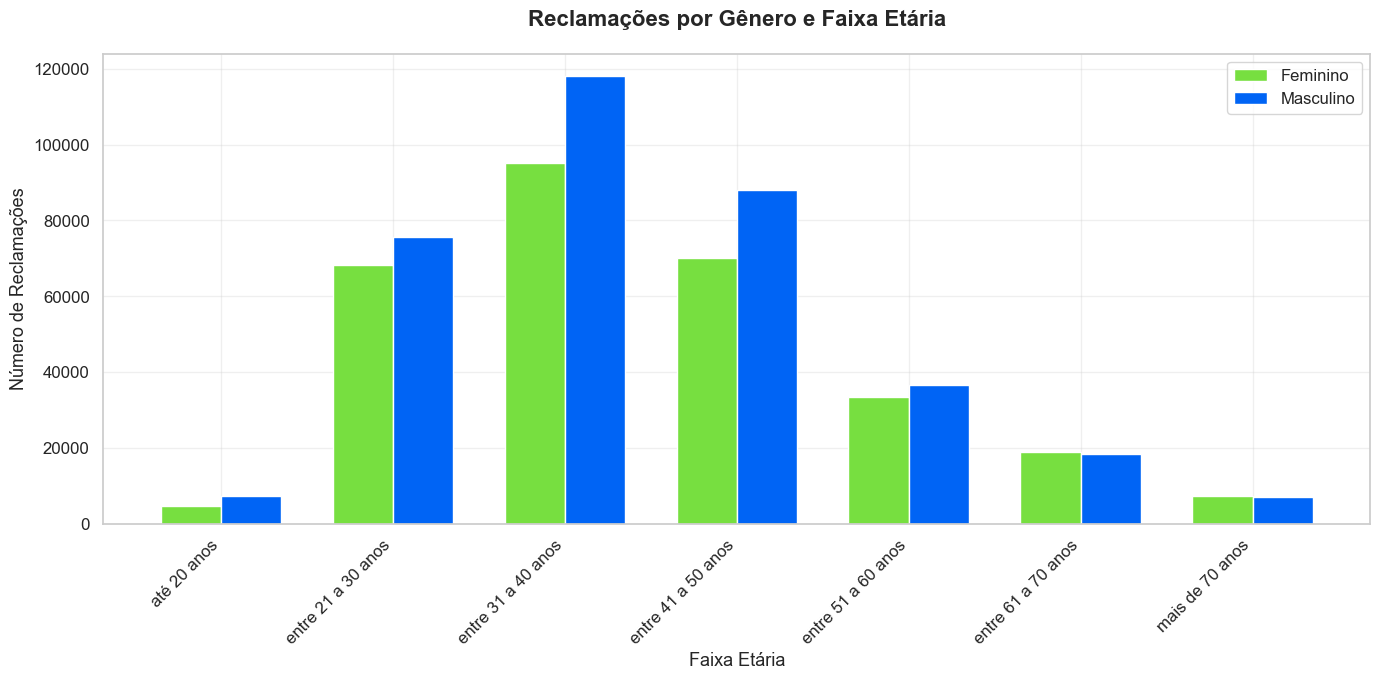


RESUMO EXECUTIVO:

DISTRIBUIÇÃO GERAL:
  Feminino: 298,034 (45.9%)
  Masculino: 351,000 (54.1%)
  Diferença: 52,966 reclamações a mais para Masculino

FAIXA ETÁRIA PREDOMINANTE:
  entre 31 a 40 anos: 213,273 reclamações (32.9% do total)
  Feminino: 95,134 | Masculino: 118,139

CONCENTRAÇÃO (21 a 50 anos):
  Total: 515,357 (79.4% do total)
  Representa mais de 3/4 das reclamações do estado

FAIXAS EXTREMAS:
  Até 20 anos: 11,948 (1.8%)
  Mais de 70 anos: 14,537 (2.2%)
  Juntas representam apenas 4.1% do total

DIFERENÇA MASCULINO/FEMININO POR FAIXA:
  até 20 anos: M com 2,470 reclamações a mais
  entre 21 a 30 anos: M com 7,221 reclamações a mais
  entre 31 a 40 anos: M com 23,005 reclamações a mais
  entre 41 a 50 anos: M com 18,037 reclamações a mais
  entre 51 a 60 anos: M com 3,260 reclamações a mais
  entre 61 a 70 anos: F com 726 reclamações a mais
  mais de 70 anos: F com 301 reclamações a mais


In [35]:
# VISUALIZAÇÃO: Comparação Gênero x Faixa Etária
# Objetivo: Visualizar de forma clara as diferenças entre gêneros em cada faixa etária

print("=" * 80)
print("GRÁFICO: DISTRIBUIÇÃO POR GÊNERO E FAIXA ETÁRIA")
print("=" * 80)

# Preparar dados (excluir Não Informado e Outro para clareza)
df_analise = df_sp_completo[df_sp_completo['sexo'].isin(['M', 'F'])].copy()
df_analise = df_analise[df_analise['faixa_etaria'] != 'Não Informado']

# Criar tabela resumida
resumo = df_analise.groupby(['faixa_etaria', 'sexo']).size().reset_index(name='quantidade')
resumo_pivot = resumo.pivot(index='faixa_etaria', columns='sexo', values='quantidade')

# Ordenar faixas etárias logicamente
ordem_faixas = [
    'até 20 anos',
    'entre 21 a 30 anos', 
    'entre 31 a 40 anos',
    'entre 41 a 50 anos',
    'entre 51 a 60 anos',
    'entre 61 a 70 anos',
    'mais de 70 anos'
]
resumo_pivot = resumo_pivot.reindex(ordem_faixas)

# Criar gráfico de barras agrupadas
fig, ax = plt.subplots(figsize=(14, 7))

x = np.arange(len(resumo_pivot.index))
largura = 0.35

barras_f = ax.bar(x - largura/2, resumo_pivot['F'], largura, 
                   label='Feminino', color=CORES_AGIBANK['verde'])
barras_m = ax.bar(x + largura/2, resumo_pivot['M'], largura, 
                   label='Masculino', color=CORES_AGIBANK['azul_principal'])

ax.set_title('Reclamações por Gênero e Faixa Etária', fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Faixa Etária', fontsize=13)
ax.set_ylabel('Número de Reclamações', fontsize=13)
ax.set_xticks(x)
ax.set_xticklabels(resumo_pivot.index, rotation=45, ha='right')
ax.legend(fontsize=12)
ax.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

# Análise detalhada e relevante
print("\nRESUMO EXECUTIVO:")
print("=" * 80)

total_f = resumo_pivot['F'].sum()
total_m = resumo_pivot['M'].sum()
total_geral = total_f + total_m

print(f"\nDISTRIBUIÇÃO GERAL:")
print(f"  Feminino: {total_f:,} ({total_f/total_geral*100:.1f}%)")
print(f"  Masculino: {total_m:,} ({total_m/total_geral*100:.1f}%)")
print(f"  Diferença: {abs(total_m - total_f):,} reclamações a mais para {'Masculino' if total_m > total_f else 'Feminino'}")

# Faixa etária predominante
faixa_max = resumo_pivot.sum(axis=1).idxmax()
qtd_max = resumo_pivot.sum(axis=1).max()
pct_max = (qtd_max / total_geral) * 100

print(f"\nFAIXA ETÁRIA PREDOMINANTE:")
print(f"  {faixa_max}: {qtd_max:,} reclamações ({pct_max:.1f}% do total)")
print(f"  Feminino: {resumo_pivot.loc[faixa_max, 'F']:,} | Masculino: {resumo_pivot.loc[faixa_max, 'M']:,}")

# Concentração etária (21 a 50 anos)
faixas_principais = ['entre 21 a 30 anos', 'entre 31 a 40 anos', 'entre 41 a 50 anos']
qtd_principais = resumo_pivot.loc[faixas_principais].sum().sum()
pct_principais = (qtd_principais / total_geral) * 100

print(f"\nCONCENTRAÇÃO (21 a 50 anos):")
print(f"  Total: {qtd_principais:,} ({pct_principais:.1f}% do total)")
print(f"  Representa mais de 3/4 das reclamações do estado")

# Faixas extremas (jovens e idosos)
faixa_jovem = resumo_pivot.loc['até 20 anos'].sum()
faixa_idoso = resumo_pivot.loc['mais de 70 anos'].sum()
pct_jovem = (faixa_jovem / total_geral) * 100
pct_idoso = (faixa_idoso / total_geral) * 100

print(f"\nFAIXAS EXTREMAS:")
print(f"  Até 20 anos: {faixa_jovem:,} ({pct_jovem:.1f}%)")
print(f"  Mais de 70 anos: {faixa_idoso:,} ({pct_idoso:.1f}%)")
print(f"  Juntas representam apenas {pct_jovem + pct_idoso:.1f}% do total")

# Diferença por faixa
print(f"\nDIFERENÇA MASCULINO/FEMININO POR FAIXA:")
for faixa in ordem_faixas:
    f = resumo_pivot.loc[faixa, 'F']
    m = resumo_pivot.loc[faixa, 'M']
    dif = m - f
    predominante = 'M' if dif > 0 else 'F'
    print(f"  {faixa}: {predominante} com {abs(dif):,} reclamações a mais")

In [37]:
# ANÁLISE: Satisfação do Consumidor Paulista
# Objetivo: Avaliar o nível de satisfação através das notas atribuídas pelos consumidores

print("=" * 80)
print("SATISFAÇÃO DO CONSUMIDOR PAULISTA")
print("=" * 80)

# Extrai array de notas e remove valores ausentes para cálculos
arr_nota_valida = arr_nota[~np.isnan(arr_nota)]

# Calcula estatísticas descritivas
nota_media = np.mean(arr_nota_valida)
nota_mediana = np.median(arr_nota_valida)
nota_desvio = np.std(arr_nota_valida)
nota_min = np.min(arr_nota_valida)
nota_max = np.max(arr_nota_valida)

# Conta distribuição de notas
notas_unicas, contagem_notas = np.unique(arr_nota_valida, return_counts=True)

# Calcula percentuais
pct_notas = (contagem_notas / len(arr_nota_valida)) * 100

# Classifica por categoria de satisfação
insatisfeitos = np.sum(arr_nota_valida <= 2)
neutros = np.sum(arr_nota_valida == 3)
satisfeitos = np.sum(arr_nota_valida >= 4)

pct_insatisfeitos = (insatisfeitos / len(arr_nota_valida)) * 100
pct_neutros = (neutros / len(arr_nota_valida)) * 100
pct_satisfeitos = (satisfeitos / len(arr_nota_valida)) * 100

# Calcula NPS (Net Promoter Score)
promotores = np.sum(arr_nota_valida >= 4)
detratores = np.sum(arr_nota_valida <= 2)
nps = ((promotores - detratores) / len(arr_nota_valida)) * 100

# Taxa de avaliação
total_com_nota = len(arr_nota_valida)
total_sem_nota = np.sum(np.isnan(arr_nota))
taxa_avaliacao = (total_com_nota / len(arr_nota)) * 100

print(f"\nESTATÍSTICAS GERAIS:")
print(f"  Nota média: {nota_media:.2f}")
print(f"  Nota mediana: {nota_mediana:.2f}")
print(f"  Desvio padrão: {nota_desvio:.2f}")
print(f"  Amplitude: {nota_min:.0f} a {nota_max:.0f}")

print(f"\nDISTRIBUIÇÃO POR CATEGORIA:")
print(f"  Insatisfeitos (≤2): {insatisfeitos:,} ({pct_insatisfeitos:.1f}%)")
print(f"  Neutros (=3): {neutros:,} ({pct_neutros:.1f}%)")
print(f"  Satisfeitos (≥4): {satisfeitos:,} ({pct_satisfeitos:.1f}%)")

print(f"\nNPS (NET PROMOTER SCORE):")
print(f"  NPS: {nps:+.1f}")

print(f"\nTAXA DE AVALIAÇÃO:")
print(f"  Com nota: {total_com_nota:,} ({taxa_avaliacao:.1f}%)")
print(f"  Sem nota: {total_sem_nota:,} ({100 - taxa_avaliacao:.1f}%)")

# Monta DataFrame com distribuição detalhada
df_notas = pd.DataFrame({
    'Nota': notas_unicas.astype(int),
    'Quantidade': contagem_notas,
    '% do Total': pct_notas
}).set_index('Nota')

display(
    df_notas.style
    .format({
        'Quantidade': '{:,.0f}',
        '% do Total': '{:.1f}%'
    })
    .background_gradient(cmap='RdYlGn', subset=['% do Total'])
    .set_caption('Distribuição Detalhada das Notas - Estado de São Paulo')
)

SATISFAÇÃO DO CONSUMIDOR PAULISTA

ESTATÍSTICAS GERAIS:
  Nota média: 2.53
  Nota mediana: 1.00
  Desvio padrão: 1.74
  Amplitude: 1 a 5

DISTRIBUIÇÃO POR CATEGORIA:
  Insatisfeitos (≤2): 110,370 (56.7%)
  Neutros (=3): 17,280 (8.9%)
  Satisfeitos (≥4): 67,030 (34.4%)

NPS (NET PROMOTER SCORE):
  NPS: -22.3

TAXA DE AVALIAÇÃO:
  Com nota: 194,680 (30.0%)
  Sem nota: 454,877 (70.0%)


,Quantidade,% do Total
Nota,,
1,"100,013",51.4%
2,"10,357",5.3%
3,"17,280",8.9%
4,"14,738",7.6%
5,"52,292",26.9%


GRÁFICO: DISTRIBUIÇÃO DE SATISFAÇÃO


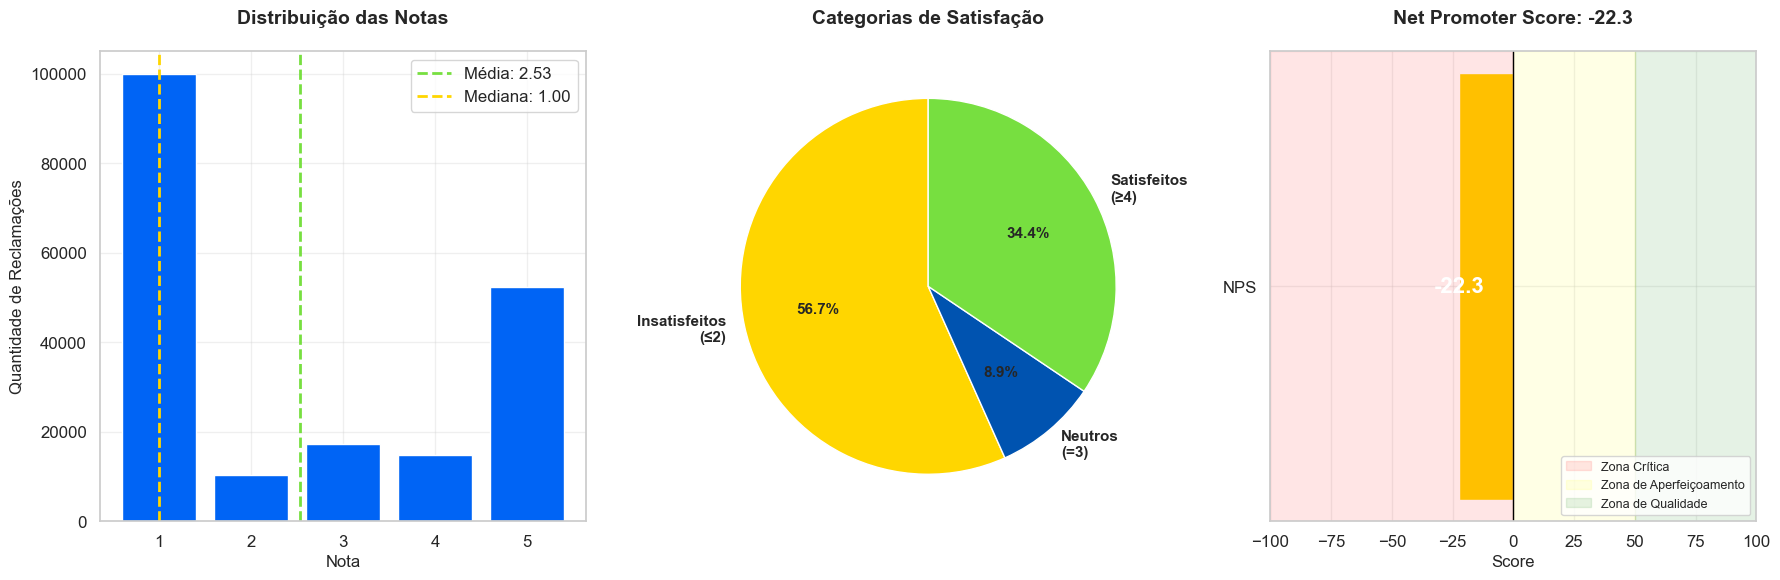

In [38]:
# VISUALIZAÇÃO: Distribuição de Satisfação
# Objetivo: Representar graficamente os níveis de satisfação dos consumidores paulistas

print("=" * 80)
print("GRÁFICO: DISTRIBUIÇÃO DE SATISFAÇÃO")
print("=" * 80)

# Criar figura com três subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))

# Gráfico 1: Histograma de notas
ax1.bar(notas_unicas, contagem_notas, color=CORES_AGIBANK['azul_principal'], 
        edgecolor='white', linewidth=1)
ax1.axvline(x=nota_media, color=CORES_AGIBANK['verde'], linestyle='--', 
            linewidth=2, label=f'Média: {nota_media:.2f}')
ax1.axvline(x=nota_mediana, color=CORES_AGIBANK['amarelo'], linestyle='--', 
            linewidth=2, label=f'Mediana: {nota_mediana:.2f}')
ax1.set_title('Distribuição das Notas', fontsize=14, fontweight='bold', pad=20)
ax1.set_xlabel('Nota', fontsize=12)
ax1.set_ylabel('Quantidade de Reclamações', fontsize=12)
ax1.set_xticks(notas_unicas)
ax1.legend()
ax1.grid(True, alpha=0.3, axis='y')

# Gráfico 2: Pizza de categorias
categorias = ['Insatisfeitos\n(≤2)', 'Neutros\n(=3)', 'Satisfeitos\n(≥4)']
valores_cat = [insatisfeitos, neutros, satisfeitos]
cores_cat = [CORES_AGIBANK['amarelo'], CORES_AGIBANK['azul_medio'], CORES_AGIBANK['verde']]

ax2.pie(valores_cat, labels=categorias, autopct='%1.1f%%', colors=cores_cat,
        startangle=90, textprops={'fontsize': 11, 'fontweight': 'bold'})
ax2.set_title('Categorias de Satisfação', fontsize=14, fontweight='bold', pad=20)

# Gráfico 3: NPS visual
ax3.barh(['NPS'], [nps], color=CORES_AGIBANK['verde'] if nps > 0 else CORES_AGIBANK['amarelo'],
         height=0.5)
ax3.axvline(x=0, color='black', linewidth=1)
ax3.set_xlim(-100, 100)
ax3.set_xlabel('Score', fontsize=12)
ax3.set_title(f'Net Promoter Score: {nps:+.1f}', fontsize=14, fontweight='bold', pad=20)
ax3.text(nps, 0, f'{nps:+.1f}', ha='center', va='center', 
         fontsize=16, fontweight='bold', color='white')
ax3.grid(True, alpha=0.3, axis='x')

# Adicionar zonas do NPS
ax3.axvspan(-100, 0, alpha=0.1, color='red', label='Zona Crítica')
ax3.axvspan(0, 50, alpha=0.1, color='yellow', label='Zona de Aperfeiçoamento')
ax3.axvspan(50, 100, alpha=0.1, color='green', label='Zona de Qualidade')
ax3.legend(loc='lower right', fontsize=9)

plt.tight_layout()
plt.show()

In [41]:
# ANÁLISE: Distribuição Geográfica Interna de São Paulo
# Objetivo: Identificar as principais cidades do estado em volume de reclamações

print("=" * 80)
print("DISTRIBUIÇÃO GEOGRÁFICA: TOP 20 CIDADES DE SÃO PAULO")
print("=" * 80)

# Usar arrays já criados na preparação
cidades_unicas_sp, contagem_cidades = np.unique(arr_cidade, return_counts=True)

# Ordenar do maior para o menor
idx_ord_cidades = np.argsort(contagem_cidades)[::-1]
cidades_ordenadas = cidades_unicas_sp[idx_ord_cidades]
contagens_ordenadas = contagem_cidades[idx_ord_cidades]

# Selecionar TOP 20
top20_cidades = cidades_ordenadas[:20]
top20_contagens = contagens_ordenadas[:20]

# Calcular percentuais
pct_top20 = (top20_contagens / total_registros) * 100

# Identificar posições específicas
posicao_capital = 1  # São Paulo sempre será a primeira
posicao_campinas = np.where(top20_cidades == 'CAMPINAS')[0][0] + 1 if 'CAMPINAS' in top20_cidades else None

# Calcular concentração
total_capital = contagens_ordenadas[0]
total_interior = total_registros - total_capital
pct_capital = (total_capital / total_registros) * 100
pct_interior = (total_interior / total_registros) * 100

print(f"\nCONCENTRAÇÃO GEOGRÁFICA:")
print(f"  Capital (São Paulo): {total_capital:,} ({pct_capital:.1f}%)")
print(f"  Interior: {total_interior:,} ({pct_interior:.1f}%)")

if posicao_campinas:
    qtd_campinas = top20_contagens[posicao_campinas - 1]
    pct_campinas_sp = (qtd_campinas / total_registros) * 100
    pct_campinas_interior = (qtd_campinas / total_interior) * 100
    
    print(f"\nDESTAQUE CAMPINAS:")
    print(f"  Posição no ranking: {posicao_campinas}º lugar")
    print(f"  Reclamações: {qtd_campinas:,}")
    print(f"  Representa {pct_campinas_sp:.1f}% de SP")
    print(f"  Representa {pct_campinas_interior:.1f}% do Interior")

# Monta DataFrame TOP 20
df_top20_cidades = pd.DataFrame({
    'Posição': np.arange(1, 21),
    'Cidade': top20_cidades,
    'Reclamações': top20_contagens,
    '% de SP': pct_top20,
    'Tipo': ['Capital' if cidade == 'SÃO PAULO' else 'Interior' for cidade in top20_cidades]
}).set_index('Posição')

# Função para aplicar estilo na coluna Tipo (4 colunas após o index)
def estilo_tipo(row):
    if row['Tipo'] == 'Capital':
        return ['', '', '', 'background-color: #90EE90; color: black']
    elif row.name == posicao_campinas:
        return ['', '', '', 'background-color: #FFE4B5; color: black']
    else:
        return ['', '', '', '']

display(
    df_top20_cidades.style
    .format({
        'Reclamações': '{:,.0f}',
        '% de SP': '{:.2f}%'
    })
    .background_gradient(cmap='Blues', subset=['Reclamações'])
    .apply(estilo_tipo, axis=1)
    .set_caption('TOP 20 Cidades com Mais Reclamações - Estado de São Paulo')
)

DISTRIBUIÇÃO GEOGRÁFICA: TOP 20 CIDADES DE SÃO PAULO

CONCENTRAÇÃO GEOGRÁFICA:
  Capital (São Paulo): 227,446 (35.0%)
  Interior: 422,111 (65.0%)

DESTAQUE CAMPINAS:
  Posição no ranking: 3º lugar
  Reclamações: 18,330
  Representa 2.8% de SP
  Representa 4.3% do Interior


,Cidade,Reclamações,% de SP,Tipo
Posição,,,,
1,SÃO PAULO,"227,446",35.02%,Capital
2,GUARULHOS,"20,522",3.16%,Interior
3,CAMPINAS,"18,330",2.82%,Interior
4,SOROCABA,"14,270",2.20%,Interior
5,OSASCO,"13,420",2.07%,Interior
6,SÃO BERNARDO DO CAMPO,"13,229",2.04%,Interior
7,SANTO ANDRÉ,"12,996",2.00%,Interior
8,RIBEIRÃO PRETO,"11,769",1.81%,Interior
9,SÃO JOSÉ DOS CAMPOS,"11,415",1.76%,Interior


GRÁFICO: DISTRIBUIÇÃO GEOGRÁFICA


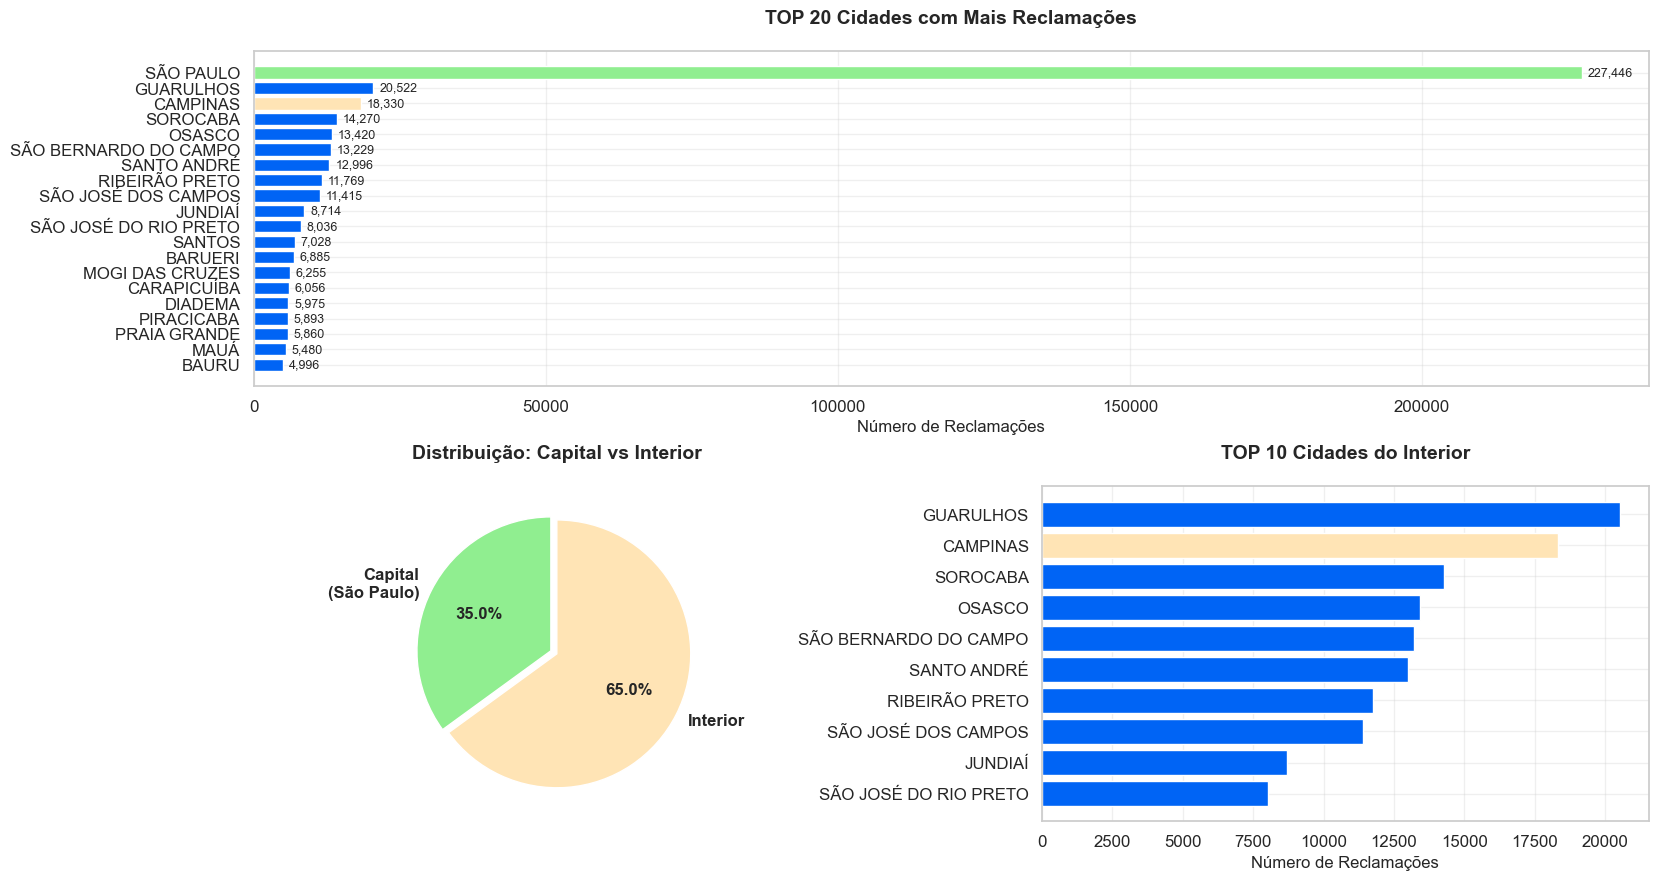

In [42]:
# VISUALIZAÇÃO: Distribuição Geográfica de São Paulo
# Objetivo: Representar graficamente a concentração de reclamações no estado

print("=" * 80)
print("GRÁFICO: DISTRIBUIÇÃO GEOGRÁFICA")
print("=" * 80)

# Criar figura com três subplots
fig = plt.figure(figsize=(18, 10))
gs = fig.add_gridspec(2, 2, hspace=0.3, wspace=0.3)

ax1 = fig.add_subplot(gs[0, :])  # Gráfico superior ocupa toda a largura
ax2 = fig.add_subplot(gs[1, 0])  # Gráfico inferior esquerdo
ax3 = fig.add_subplot(gs[1, 1])  # Gráfico inferior direito

# Gráfico 1: Ranking TOP 20 cidades (barras horizontais)
cores_ranking = ['#90EE90' if cidade == 'SÃO PAULO' 
                 else '#FFE4B5' if cidade == 'CAMPINAS' 
                 else CORES_AGIBANK['azul_principal'] 
                 for cidade in top20_cidades]

y_pos = np.arange(len(top20_cidades))
ax1.barh(y_pos, top20_contagens, color=cores_ranking, edgecolor='white', linewidth=1)
ax1.set_yticks(y_pos)
ax1.set_yticklabels(top20_cidades)
ax1.invert_yaxis()
ax1.set_xlabel('Número de Reclamações', fontsize=12)
ax1.set_title('TOP 20 Cidades com Mais Reclamações', fontsize=14, fontweight='bold', pad=20)
ax1.grid(True, alpha=0.3, axis='x')

# Adicionar valores nas barras
for i, (cidade, valor) in enumerate(zip(top20_cidades, top20_contagens)):
    ax1.text(valor + 1000, i, f'{valor:,}', va='center', fontsize=9)

# Gráfico 2: Pizza Capital vs Interior
categorias_geo = ['Capital\n(São Paulo)', 'Interior']
valores_geo = [total_capital, total_interior]
cores_geo = ['#90EE90', '#FFE4B5']
explode = (0.05, 0)

ax2.pie(valores_geo, labels=categorias_geo, autopct='%1.1f%%', colors=cores_geo,
        explode=explode, startangle=90, textprops={'fontsize': 12, 'fontweight': 'bold'})
ax2.set_title('Distribuição: Capital vs Interior', fontsize=14, fontweight='bold', pad=20)

# Gráfico 3: TOP 10 Interior (excluindo capital)
top10_interior = top20_cidades[1:11]  # Pula São Paulo
top10_interior_valores = top20_contagens[1:11]

ax3.barh(np.arange(len(top10_interior)), top10_interior_valores, 
         color=['#FFE4B5' if cidade == 'CAMPINAS' else CORES_AGIBANK['azul_principal'] 
                for cidade in top10_interior],
         edgecolor='white', linewidth=1)
ax3.set_yticks(np.arange(len(top10_interior)))
ax3.set_yticklabels(top10_interior)
ax3.invert_yaxis()
ax3.set_xlabel('Número de Reclamações', fontsize=12)
ax3.set_title('TOP 10 Cidades do Interior', fontsize=14, fontweight='bold', pad=20)
ax3.grid(True, alpha=0.3, axis='x')

plt.show()

In [43]:
# ANÁLISE: Comparação Capital vs Interior
# Objetivo: Identificar diferenças de desempenho entre Capital e Interior de São Paulo

print("=" * 80)
print("COMPARAÇÃO: CAPITAL VS INTERIOR")
print("=" * 80)

# Separar dados de Capital e Interior
mask_capital = df_sp_completo['eh_capital']
mask_interior = df_sp_completo['eh_interior']

# Extrair arrays para cada grupo
arr_nota_capital = df_sp_completo.loc[mask_capital, 'nota_do_consumidor'].to_numpy()
arr_nota_interior = df_sp_completo.loc[mask_interior, 'nota_do_consumidor'].to_numpy()

arr_tempo_capital = df_sp_completo.loc[mask_capital, 'tempo_resposta'].to_numpy()
arr_tempo_interior = df_sp_completo.loc[mask_interior, 'tempo_resposta'].to_numpy()

arr_avaliacao_capital = df_sp_completo.loc[mask_capital, 'avaliacao_reclamacao'].to_numpy()
arr_avaliacao_interior = df_sp_completo.loc[mask_interior, 'avaliacao_reclamacao'].to_numpy()

# NOTA MÉDIA
nota_media_capital = np.nanmean(arr_nota_capital)
nota_media_interior = np.nanmean(arr_nota_interior)
diferenca_nota = nota_media_interior - nota_media_capital

# TEMPO MÉDIO DE RESPOSTA
tempo_medio_capital = np.nanmean(arr_tempo_capital)
tempo_medio_interior = np.nanmean(arr_tempo_interior)
diferenca_tempo = tempo_medio_interior - tempo_medio_capital

# TAXA DE RESOLUÇÃO
resolvidas_capital = np.sum(arr_avaliacao_capital == 'Resolvida')
total_avaliadas_capital = np.sum(~pd.isna(arr_avaliacao_capital))
taxa_resolucao_capital = (resolvidas_capital / total_avaliadas_capital) * 100 if total_avaliadas_capital > 0 else 0

resolvidas_interior = np.sum(arr_avaliacao_interior == 'Resolvida')
total_avaliadas_interior = np.sum(~pd.isna(arr_avaliacao_interior))
taxa_resolucao_interior = (resolvidas_interior / total_avaliadas_interior) * 100 if total_avaliadas_interior > 0 else 0

diferenca_resolucao = taxa_resolucao_interior - taxa_resolucao_capital

# Monta DataFrame comparativo
df_comparacao = pd.DataFrame({
    'Indicador': ['Volume de Reclamações', 'Nota Média', 'Tempo Médio (dias)', 'Taxa de Resolução (%)'],
    'Capital': [
        f'{total_capital:,}',
        f'{nota_media_capital:.2f}',
        f'{tempo_medio_capital:.1f}',
        f'{taxa_resolucao_capital:.1f}%'
    ],
    'Interior': [
        f'{total_interior:,}',
        f'{nota_media_interior:.2f}',
        f'{tempo_medio_interior:.1f}',
        f'{taxa_resolucao_interior:.1f}%'
    ],
    'Diferença': [
        f'{total_interior - total_capital:+,}',
        f'{diferenca_nota:+.2f}',
        f'{diferenca_tempo:+.1f}',
        f'{diferenca_resolucao:+.1f}pp'
    ]
}).set_index('Indicador')

print("\nCOMPARAÇÃO DE INDICADORES:")
print("-" * 80)
display(df_comparacao)

# Análise interpretativa
print("\nINTERPRETAÇÃO:")
print("-" * 80)

if diferenca_nota > 0:
    print(f"O Interior tem nota {abs(diferenca_nota):.2f} pontos MAIOR que a Capital")
else:
    print(f"A Capital tem nota {abs(diferenca_nota):.2f} pontos MAIOR que o Interior")

if diferenca_tempo > 0:
    print(f"O Interior demora {abs(diferenca_tempo):.1f} dias A MAIS para responder")
else:
    print(f"A Capital demora {abs(diferenca_tempo):.1f} dias A MAIS para responder")

if diferenca_resolucao > 0:
    print(f"O Interior resolve {abs(diferenca_resolucao):.1f}pp A MAIS de casos")
else:
    print(f"A Capital resolve {abs(diferenca_resolucao):.1f}pp A MAIS de casos")

COMPARAÇÃO: CAPITAL VS INTERIOR

COMPARAÇÃO DE INDICADORES:
--------------------------------------------------------------------------------


,Capital,Interior,Diferença
Indicador,,,
Volume de Reclamações,"227,446","422,111","+194,665"
Nota Média,2.53,2.54,+0.01
Tempo Médio (dias),6.3,6.2,-0.2
Taxa de Resolução (%),15.5%,13.6%,-1.8pp



INTERPRETAÇÃO:
--------------------------------------------------------------------------------
O Interior tem nota 0.01 pontos MAIOR que a Capital
A Capital demora 0.2 dias A MAIS para responder
A Capital resolve 1.8pp A MAIS de casos


In [44]:
# ANÁLISE: Perfil Demográfico Capital vs Interior
# Objetivo: Comparar distribuição de gênero e faixa etária entre Capital e Interior

print("=" * 80)
print("PERFIL DEMOGRÁFICO: CAPITAL VS INTERIOR")
print("=" * 80)

# DISTRIBUIÇÃO POR GÊNERO
print("\nDISTRIBUIÇÃO POR GÊNERO:")
print("-" * 80)

# Capital
arr_sexo_capital = df_sp_completo.loc[mask_capital, 'sexo'].fillna('Não Informado').to_numpy()
generos_capital, contagem_genero_capital = np.unique(arr_sexo_capital, return_counts=True)
pct_genero_capital = (contagem_genero_capital / len(arr_sexo_capital)) * 100

# Interior
arr_sexo_interior = df_sp_completo.loc[mask_interior, 'sexo'].fillna('Não Informado').to_numpy()
generos_interior, contagem_genero_interior = np.unique(arr_sexo_interior, return_counts=True)
pct_genero_interior = (contagem_genero_interior / len(arr_sexo_interior)) * 100

# Monta DataFrame comparativo de gênero
df_genero_comp = pd.DataFrame({
    'Gênero': ['Feminino', 'Masculino', 'Outro'],
    'Capital (qtd)': [
        contagem_genero_capital[generos_capital == 'F'][0] if 'F' in generos_capital else 0,
        contagem_genero_capital[generos_capital == 'M'][0] if 'M' in generos_capital else 0,
        contagem_genero_capital[generos_capital == 'O'][0] if 'O' in generos_capital else 0
    ],
    'Capital (%)': [
        pct_genero_capital[generos_capital == 'F'][0] if 'F' in generos_capital else 0,
        pct_genero_capital[generos_capital == 'M'][0] if 'M' in generos_capital else 0,
        pct_genero_capital[generos_capital == 'O'][0] if 'O' in generos_capital else 0
    ],
    'Interior (qtd)': [
        contagem_genero_interior[generos_interior == 'F'][0] if 'F' in generos_interior else 0,
        contagem_genero_interior[generos_interior == 'M'][0] if 'M' in generos_interior else 0,
        contagem_genero_interior[generos_interior == 'O'][0] if 'O' in generos_interior else 0
    ],
    'Interior (%)': [
        pct_genero_interior[generos_interior == 'F'][0] if 'F' in generos_interior else 0,
        pct_genero_interior[generos_interior == 'M'][0] if 'M' in generos_interior else 0,
        pct_genero_interior[generos_interior == 'O'][0] if 'O' in generos_interior else 0
    ]
}).set_index('Gênero')

display(
    df_genero_comp.style
    .format({
        'Capital (qtd)': '{:,.0f}',
        'Capital (%)': '{:.1f}%',
        'Interior (qtd)': '{:,.0f}',
        'Interior (%)': '{:.1f}%'
    })
    .background_gradient(cmap='Greens', subset=['Capital (%)'])
    .background_gradient(cmap='Blues', subset=['Interior (%)'])
    .set_caption('Distribuição de Gênero: Capital vs Interior')
)

# DISTRIBUIÇÃO POR FAIXA ETÁRIA
print("\n\nDISTRIBUIÇÃO POR FAIXA ETÁRIA:")
print("-" * 80)

# Capital
arr_faixa_capital = df_sp_completo.loc[mask_capital, 'faixa_etaria'].fillna('Não Informado').to_numpy()
faixas_capital, contagem_faixa_capital = np.unique(arr_faixa_capital, return_counts=True)
pct_faixa_capital = (contagem_faixa_capital / len(arr_faixa_capital)) * 100

# Interior
arr_faixa_interior = df_sp_completo.loc[mask_interior, 'faixa_etaria'].fillna('Não Informado').to_numpy()
faixas_interior, contagem_faixa_interior = np.unique(arr_faixa_interior, return_counts=True)
pct_faixa_interior = (contagem_faixa_interior / len(arr_faixa_interior)) * 100

# Criar DataFrame consolidado de faixas etárias
ordem_faixas_comp = [
    'até 20 anos',
    'entre 21 a 30 anos',
    'entre 31 a 40 anos',
    'entre 41 a 50 anos',
    'entre 51 a 60 anos',
    'entre 61 a 70 anos',
    'mais de 70 anos'
]

dados_faixa_comp = []
for faixa in ordem_faixas_comp:
    capital_qtd = contagem_faixa_capital[faixas_capital == faixa][0] if faixa in faixas_capital else 0
    capital_pct = pct_faixa_capital[faixas_capital == faixa][0] if faixa in faixas_capital else 0
    interior_qtd = contagem_faixa_interior[faixas_interior == faixa][0] if faixa in faixas_interior else 0
    interior_pct = pct_faixa_interior[faixas_interior == faixa][0] if faixa in faixas_interior else 0
    
    dados_faixa_comp.append([faixa, capital_qtd, capital_pct, interior_qtd, interior_pct])

df_faixa_comp = pd.DataFrame(
    dados_faixa_comp,
    columns=['Faixa Etária', 'Capital (qtd)', 'Capital (%)', 'Interior (qtd)', 'Interior (%)']
).set_index('Faixa Etária')

display(
    df_faixa_comp.style
    .format({
        'Capital (qtd)': '{:,.0f}',
        'Capital (%)': '{:.1f}%',
        'Interior (qtd)': '{:,.0f}',
        'Interior (%)': '{:.1f}%'
    })
    .background_gradient(cmap='Greens', subset=['Capital (%)'])
    .background_gradient(cmap='Blues', subset=['Interior (%)'])
    .set_caption('Distribuição de Faixa Etária: Capital vs Interior')
)

PERFIL DEMOGRÁFICO: CAPITAL VS INTERIOR

DISTRIBUIÇÃO POR GÊNERO:
--------------------------------------------------------------------------------


,Capital (qtd),Capital (%),Interior (qtd),Interior (%)
Gênero,,,,
Feminino,"105,779",46.5%,"192,255",45.5%
Masculino,"121,427",53.4%,"229,573",54.4%
Outro,233,0.1%,282,0.1%




DISTRIBUIÇÃO POR FAIXA ETÁRIA:
--------------------------------------------------------------------------------


,Capital (qtd),Capital (%),Interior (qtd),Interior (%)
Faixa Etária,,,,
até 20 anos,"3,214",1.4%,"8,767",2.1%
entre 21 a 30 anos,"48,325",21.2%,"95,665",22.7%
entre 31 a 40 anos,"77,436",34.0%,"136,004",32.2%
entre 41 a 50 anos,"56,626",24.9%,"101,728",24.1%
entre 51 a 60 anos,"24,836",10.9%,"45,112",10.7%
entre 61 a 70 anos,"12,138",5.3%,"25,143",6.0%
mais de 70 anos,"4,871",2.1%,"9,692",2.3%


In [46]:
# ANÁLISE: Ranking de Instituições Financeiras em São Paulo
# Objetivo: Identificar as instituições com mais reclamações no estado

print("=" * 80)
print("RANKING: INSTITUIÇÕES FINANCEIRAS EM SÃO PAULO")
print("=" * 80)

# Extrai array de instituições
arr_instituicao = df_sp_completo['nome_fantasia'].fillna('Não Informado').to_numpy()

# Conta distribuição por instituição
instituicoes_unicas, contagem_instituicoes = np.unique(arr_instituicao, return_counts=True)

# Ordenar do maior para o menor
idx_ord_inst = np.argsort(contagem_instituicoes)[::-1]
instituicoes_ordenadas = instituicoes_unicas[idx_ord_inst]
contagens_ordenadas = contagem_instituicoes[idx_ord_inst]

# Selecionar TOP 15
top15_instituicoes = instituicoes_ordenadas[:15]
top15_contagens = contagens_ordenadas[:15]

# Calcular percentuais
pct_top15 = (top15_contagens / total_registros) * 100

# Calcular concentração (Curva de Pareto)
pct_acumulado = np.cumsum(pct_top15)

# Calcular métricas por instituição
notas_por_inst = []
tempo_por_inst = []
taxa_resolucao_por_inst = []

for inst in top15_instituicoes:
    mask_inst = arr_instituicao == inst
    
    # Nota média
    notas_inst = df_sp_completo.loc[mask_inst, 'nota_do_consumidor'].to_numpy()
    nota_media_inst = np.nanmean(notas_inst)
    notas_por_inst.append(nota_media_inst)
    
    # Tempo médio
    tempo_inst = df_sp_completo.loc[mask_inst, 'tempo_resposta'].to_numpy()
    tempo_medio_inst = np.nanmean(tempo_inst)
    tempo_por_inst.append(tempo_medio_inst)
    
    # Taxa de resolução
    avaliacao_inst = df_sp_completo.loc[mask_inst, 'avaliacao_reclamacao'].to_numpy()
    resolvidas_inst = np.sum(avaliacao_inst == 'Resolvida')
    total_avaliadas_inst = np.sum(~pd.isna(avaliacao_inst))
    taxa_inst = (resolvidas_inst / total_avaliadas_inst) * 100 if total_avaliadas_inst > 0 else 0
    taxa_resolucao_por_inst.append(taxa_inst)

# Converter para arrays numpy
notas_por_inst = np.array(notas_por_inst)
tempo_por_inst = np.array(tempo_por_inst)
taxa_resolucao_por_inst = np.array(taxa_resolucao_por_inst)

print(f"\nCONCENTRAÇÃO DE MERCADO:")
print(f"  TOP 5 instituições: {pct_acumulado[4]:.1f}% das reclamações")
print(f"  TOP 10 instituições: {pct_acumulado[9]:.1f}% das reclamações")
print(f"  TOP 15 instituições: {pct_acumulado[14]:.1f}% das reclamações")

# Monta DataFrame TOP 15
df_top15_inst = pd.DataFrame({
    'Posição': np.arange(1, 16),
    'Instituição': top15_instituicoes,
    'Reclamações': top15_contagens,
    '% SP': pct_top15,
    '% Acumulado': pct_acumulado,
    'Nota Média': notas_por_inst,
    'Tempo (dias)': tempo_por_inst,
    'Taxa Resolução (%)': taxa_resolucao_por_inst
}).set_index('Posição')

display(
    df_top15_inst.style
    .format({
        'Reclamações': '{:,.0f}',
        '% SP': '{:.2f}%',
        '% Acumulado': '{:.1f}%',
        'Nota Média': '{:.2f}',
        'Tempo (dias)': '{:.1f}',
        'Taxa Resolução (%)': '{:.1f}%'
    })
    .background_gradient(cmap='Blues', subset=['Reclamações'])
    .background_gradient(cmap='RdYlGn', subset=['Nota Média'], vmin=1, vmax=5)
    .background_gradient(cmap='Greens', subset=['Taxa Resolução (%)'])
    .set_caption('TOP 15 Instituições Financeiras - Estado de São Paulo')
)

RANKING: INSTITUIÇÕES FINANCEIRAS EM SÃO PAULO

CONCENTRAÇÃO DE MERCADO:
  TOP 5 instituições: 22.9% das reclamações
  TOP 10 instituições: 34.7% das reclamações
  TOP 15 instituições: 42.6% das reclamações


,Instituição,Reclamações,% SP,% Acumulado,Nota Média,Tempo (dias),Taxa Resolução (%)
Posição,,,,,,,
1,Serasa Experian,"40,032",6.16%,6.2%,2.63,3.5,10.1%
2,Nubank,"37,381",5.75%,11.9%,1.80,3.5,3.6%
3,Banco Santander,"26,741",4.12%,16.0%,2.07,5.7,7.2%
4,Vivo - Telefônica,"23,606",3.63%,19.7%,3.79,7.6,37.6%
5,Banco Bradesco,"20,734",3.19%,22.9%,2.03,8.8,5.9%
6,Banco do Brasil,"17,929",2.76%,25.6%,2.47,4.6,8.7%
7,Banco Itaú Unibanco,"17,660",2.72%,28.3%,2.08,6.7,7.8%
8,Caixa Econômica Federal,"15,295",2.35%,30.7%,2.65,6.8,13.0%
9,Enel Distribuição São Paulo (Eletropaulo),"14,495",2.23%,32.9%,2.93,7.4,24.4%


In [47]:
# INVESTIGAÇÃO: Identificar setores presentes nos dados
# Objetivo: Entender quais segmentos estão na base antes de filtrar

print("=" * 80)
print("INVESTIGAÇÃO: SEGMENTOS DE MERCADO")
print("=" * 80)

# Extrai array de segmentos
arr_segmento = df_sp_completo['segmento_de_mercado'].fillna('Não Informado').to_numpy()

# Conta distribuição por segmento
segmentos_unicos, contagem_segmentos = np.unique(arr_segmento, return_counts=True)

# Ordenar do maior para o menor
idx_ord_seg = np.argsort(contagem_segmentos)[::-1]
segmentos_ordenados = segmentos_unicos[idx_ord_seg]
contagens_seg_ordenadas = contagem_segmentos[idx_ord_seg]

# Calcular percentuais
pct_segmentos = (contagens_seg_ordenadas / total_registros) * 100

print(f"\nTOTAL DE SEGMENTOS: {len(segmentos_unicos)}")
print(f"\nTOP 20 SEGMENTOS DE MERCADO:")
print("-" * 80)

# Monta DataFrame TOP 20 segmentos
df_segmentos = pd.DataFrame({
    'Segmento': segmentos_ordenados[:20],
    'Reclamações': contagens_seg_ordenadas[:20],
    '% do Total': pct_segmentos[:20]
})

display(
    df_segmentos.style
    .format({
        'Reclamações': '{:,.0f}',
        '% do Total': '{:.2f}%'
    })
    .background_gradient(cmap='Blues', subset=['Reclamações'])
)

print("\nIDENTIFIQUE OS SEGMENTOS FINANCEIROS:")
print("Quais desses segmentos devemos MANTER para análise financeira?")

INVESTIGAÇÃO: SEGMENTOS DE MERCADO

TOTAL DE SEGMENTOS: 45

TOP 20 SEGMENTOS DE MERCADO:
--------------------------------------------------------------------------------


,Segmento,Reclamações,% do Total
0,"Bancos, Financeiras e Administradoras de Cartão","276,693",42.60%
1,"Operadoras de Telecomunicações (Telefonia, Internet, TV por assinatura)","57,700",8.88%
2,Bancos de Dados e Cadastros de Consumidores,"42,158",6.49%
3,Empresas de Pagamento Eletrônico,"27,740",4.27%
4,Comércio Eletrônico,"23,379",3.60%
5,Energia Elétrica,"23,316",3.59%
6,"Seguros, Capitalização e Previdência","23,193",3.57%
7,Provedores de Conteúdo e Outros Serviços na Internet,"22,918",3.53%
8,Empresas de Recuperação de Crédito,"22,386",3.45%
9,Transporte Aéreo,"20,320",3.13%



IDENTIFIQUE OS SEGMENTOS FINANCEIROS:
Quais desses segmentos devemos MANTER para análise financeira?


In [48]:
# INVESTIGAÇÃO: O que são "Empresas de Pagamento Eletrônico"?
# Objetivo: Verificar se devemos incluir ou não na análise financeira

print("=" * 80)
print("INVESTIGAÇÃO: EMPRESAS DE PAGAMENTO ELETRÔNICO")
print("=" * 80)

# Filtrar apenas esse segmento
mask_pagamento = df_sp_completo['segmento_de_mercado'] == 'Empresas de Pagamento Eletrônico'
df_pagamento = df_sp_completo[mask_pagamento]

# Ver principais empresas desse segmento
arr_empresas_pag = df_pagamento['nome_fantasia'].to_numpy()
empresas_pag_unicas, contagem_emp_pag = np.unique(arr_empresas_pag, return_counts=True)

# Ordenar
idx_ord = np.argsort(contagem_emp_pag)[::-1]
empresas_ordenadas = empresas_pag_unicas[idx_ord]
contagens_ordenadas = contagem_emp_pag[idx_ord]

print(f"\nTOP 15 EMPRESAS DE PAGAMENTO ELETRÔNICO:")
print("-" * 80)

for i in range(min(15, len(empresas_ordenadas))):
    print(f"{i+1}. {empresas_ordenadas[i]}: {contagens_ordenadas[i]:,} reclamações")

print("\n\nANÁLISE:")
print("-" * 80)
print("Exemplos típicos:")
print("  - Mercado Pago, PicPay, PagSeguro = SIM (são instituições de pagamento)")
print("  - PayPal, Nubank (parte pagamento) = SIM")
print("  - Empresas de vale-refeição/alimentação = TALVEZ NÃO")
print("\nDecisão: Incluir ou excluir 'Empresas de Pagamento Eletrônico'?")

INVESTIGAÇÃO: EMPRESAS DE PAGAMENTO ELETRÔNICO

TOP 15 EMPRESAS DE PAGAMENTO ELETRÔNICO:
--------------------------------------------------------------------------------
1. Mercado Pago: 10,590 reclamações
2. PicPay: 6,688 reclamações
3. Sem Parar: 3,786 reclamações
4. 99Pay: 1,395 reclamações
5. Pagseguro: 1,101 reclamações
6. PagBank (Antiga PagSeguro): 783 reclamações
7. OLX Pay: 651 reclamações
8. RecargaPay: 604 reclamações
9. Getnet: 468 reclamações
10. Cielo: 454 reclamações
11. Koin: 233 reclamações
12. ConectCar : 207 reclamações
13. Alelo - Veloe - Pede Pronto: 201 reclamações
14. SumUp: 82 reclamações
15. Ebanx: 82 reclamações


ANÁLISE:
--------------------------------------------------------------------------------
Exemplos típicos:
  - Mercado Pago, PicPay, PagSeguro = SIM (são instituições de pagamento)
  - PayPal, Nubank (parte pagamento) = SIM
  - Empresas de vale-refeição/alimentação = TALVEZ NÃO

Decisão: Incluir ou excluir 'Empresas de Pagamento Eletrônico'?


In [49]:
# INVESTIGAÇÃO: O que são "Empresas de Recuperação de Crédito"?
# Objetivo: Verificar se são relevantes para comparação com Agibank

print("=" * 80)
print("INVESTIGAÇÃO: EMPRESAS DE RECUPERAÇÃO DE CRÉDITO")
print("=" * 80)

# Filtrar apenas esse segmento
mask_recuperacao = df_sp_completo['segmento_de_mercado'] == 'Empresas de Recuperação de Crédito'
df_recuperacao = df_sp_completo[mask_recuperacao]

# Ver principais empresas desse segmento
arr_empresas_rec = df_recuperacao['nome_fantasia'].to_numpy()
empresas_rec_unicas, contagem_emp_rec = np.unique(arr_empresas_rec, return_counts=True)

# Ordenar
idx_ord_rec = np.argsort(contagem_emp_rec)[::-1]
empresas_rec_ordenadas = empresas_rec_unicas[idx_ord_rec]
contagens_rec_ordenadas = contagem_emp_rec[idx_ord_rec]

print(f"\nTOP 15 EMPRESAS DE RECUPERAÇÃO DE CRÉDITO:")
print("-" * 80)

for i in range(min(15, len(empresas_rec_ordenadas))):
    print(f"{i+1}. {empresas_rec_ordenadas[i]}: {contagens_rec_ordenadas[i]:,} reclamações")

print("\n\nANÁLISE:")
print("-" * 80)
print("Empresas de cobrança/recuperação de dívidas:")
print("  - NÃO são concorrentes diretos do Agibank")
print("  - NÃO oferecem produtos financeiros")
print("  - Apenas cobram dívidas de terceiros")
print("\nSugestão: EXCLUIR 'Empresas de Recuperação de Crédito'")

INVESTIGAÇÃO: EMPRESAS DE RECUPERAÇÃO DE CRÉDITO

TOP 15 EMPRESAS DE RECUPERAÇÃO DE CRÉDITO:
--------------------------------------------------------------------------------
1. Recovery do Brasil Consultoria : 8,545 reclamações
2. Ativos S.A: 6,748 reclamações
3. Itapeva Recuperação de Créditos: 4,218 reclamações
4. Crediativos: 1,393 reclamações
5. ARC4: 750 reclamações
6. Atlântico Fundo de Investimento: 489 reclamações
7. MGW Ativos: 186 reclamações
8. Arc4u: 30 reclamações
9. Systemcred: 9 reclamações
10. CASH DO BRASIL RECUPERACAO DE CREDITO: 8 reclamações
11. Backseg: 6 reclamações
12. Negocia Mais: 4 reclamações


ANÁLISE:
--------------------------------------------------------------------------------
Empresas de cobrança/recuperação de dívidas:
  - NÃO são concorrentes diretos do Agibank
  - NÃO oferecem produtos financeiros
  - Apenas cobram dívidas de terceiros

Sugestão: EXCLUIR 'Empresas de Recuperação de Crédito'


In [50]:
# FILTRO DEFINITIVO: Setor Financeiro Relevante para Agibank
# Objetivo: Criar base apenas com concorrentes diretos e indiretos do Agibank

print("=" * 80)
print("FILTRO DEFINITIVO: SETOR FINANCEIRO")
print("=" * 80)

# Define segmentos financeiros relevantes (EXCLUINDO recuperação de crédito)
segmentos_financeiros = [
    'Bancos',
    'Operadoras de Cartões de Crédito e Administradoras de Consórcio',
    'Empresas de Pagamento Eletrônico',
    'Seguros, Capitalização e Previdência'
]

# Cria máscara para filtrar apenas setor financeiro
mask_financeiro = df_sp_completo['segmento_de_mercado'].isin(segmentos_financeiros)

# Cria DataFrame filtrado
df_sp_financeiro = df_sp_completo[mask_financeiro].copy()

# Atualizar variáveis globais com base filtrada
total_financeiro = len(df_sp_financeiro)
pct_financeiro = (total_financeiro / total_registros) * 100
total_outros_setores = total_registros - total_financeiro
pct_outros = (total_outros_setores / total_registros) * 100

# Recalcular arrays com base filtrada
arr_cidade_fin = df_sp_financeiro['cidade'].str.upper().to_numpy()
arr_nota_fin = df_sp_financeiro['nota_do_consumidor'].to_numpy()
arr_tempo_fin = df_sp_financeiro['tempo_resposta'].to_numpy()
arr_mes_fin = df_sp_financeiro['mes_abertura'].to_numpy()
arr_avaliacao_fin = df_sp_financeiro['avaliacao_reclamacao'].to_numpy()

# Recalcular flags
eh_capital_fin = arr_cidade_fin == 'SÃO PAULO'
eh_interior_fin = ~eh_capital_fin
eh_campinas_fin = arr_cidade_fin == 'CAMPINAS'

total_capital_fin = np.sum(eh_capital_fin)
total_interior_fin = np.sum(eh_interior_fin)
total_campinas_fin = np.sum(eh_campinas_fin)

print(f"\nRESULTADO DO FILTRO:")
print(f"  Total original (todos os setores): {total_registros:,}")
print(f"  Setor Financeiro: {total_financeiro:,} ({pct_financeiro:.1f}%)")
print(f"  Outros setores (removidos): {total_outros_setores:,} ({pct_outros:.1f}%)")

print(f"\nDISTRIBUIÇÃO GEOGRÁFICA (SETOR FINANCEIRO):")
print(f"  Capital: {total_capital_fin:,} ({total_capital_fin/total_financeiro*100:.1f}%)")
print(f"  Interior: {total_interior_fin:,} ({total_interior_fin/total_financeiro*100:.1f}%)")
print(f"  Campinas: {total_campinas_fin:,} ({total_campinas_fin/total_financeiro*100:.1f}%)")

print(f"\nDISTRIBUIÇÃO POR SEGMENTO FINANCEIRO:")
print("-" * 80)

for segmento in segmentos_financeiros:
    qtd = df_sp_financeiro[df_sp_financeiro['segmento_de_mercado'] == segmento].shape[0]
    pct_seg = (qtd / total_financeiro) * 100
    print(f"  {segmento}: {qtd:,} ({pct_seg:.1f}%)")

print("\n✅ Base filtrada criada: df_sp_financeiro")
print("✅ Variáveis atualizadas com sufixo '_fin'")
print("\n⚠️  IMPORTANTE: Todas as análises anteriores precisam ser refeitas com a base filtrada!")

FILTRO DEFINITIVO: SETOR FINANCEIRO

RESULTADO DO FILTRO:
  Total original (todos os setores): 649,557
  Setor Financeiro: 50,933 (7.8%)
  Outros setores (removidos): 598,624 (92.2%)

DISTRIBUIÇÃO GEOGRÁFICA (SETOR FINANCEIRO):
  Capital: 16,555 (32.5%)
  Interior: 34,378 (67.5%)
  Campinas: 1,457 (2.9%)

DISTRIBUIÇÃO POR SEGMENTO FINANCEIRO:
--------------------------------------------------------------------------------
  Bancos: 0 (0.0%)
  Operadoras de Cartões de Crédito e Administradoras de Consórcio: 0 (0.0%)
  Empresas de Pagamento Eletrônico: 27,740 (54.5%)
  Seguros, Capitalização e Previdência: 23,193 (45.5%)

✅ Base filtrada criada: df_sp_financeiro
✅ Variáveis atualizadas com sufixo '_fin'

⚠️  IMPORTANTE: Todas as análises anteriores precisam ser refeitas com a base filtrada!


In [51]:
# INVESTIGAÇÃO URGENTE: Nomes exatos dos segmentos
# Objetivo: Descobrir os nomes corretos dos segmentos na base

print("=" * 80)
print("INVESTIGAÇÃO: NOMES EXATOS DOS SEGMENTOS")
print("=" * 80)

# Pegar TODOS os segmentos únicos
arr_todos_segmentos = df_sp_completo['segmento_de_mercado'].fillna('Não Informado').to_numpy()
segmentos_todos, contagem_todos = np.unique(arr_todos_segmentos, return_counts=True)

# Ordenar
idx_ord_todos = np.argsort(contagem_todos)[::-1]
segmentos_ordenados_todos = segmentos_todos[idx_ord_todos]
contagens_ordenadas_todos = contagem_todos[idx_ord_todos]

print(f"\nTODOS OS SEGMENTOS (completo):")
print("-" * 80)

for i, (seg, qtd) in enumerate(zip(segmentos_ordenados_todos, contagens_ordenadas_todos), 1):
    pct = (qtd / total_registros) * 100
    print(f"{i}. {seg}: {qtd:,} ({pct:.2f}%)")

print("\n\nPROCURE POR:")
print("  - Algo relacionado a 'Banco'")
print("  - Algo relacionado a 'Cartão'")
print("  - Algo relacionado a 'Crédito'")

INVESTIGAÇÃO: NOMES EXATOS DOS SEGMENTOS

TODOS OS SEGMENTOS (completo):
--------------------------------------------------------------------------------
1. Bancos, Financeiras e Administradoras de Cartão: 276,693 (42.60%)
2. Operadoras de Telecomunicações (Telefonia, Internet, TV por assinatura): 57,700 (8.88%)
3. Bancos de Dados e Cadastros de Consumidores: 42,158 (6.49%)
4. Empresas de Pagamento Eletrônico: 27,740 (4.27%)
5. Comércio Eletrônico: 23,379 (3.60%)
6. Energia Elétrica: 23,316 (3.59%)
7. Seguros, Capitalização e Previdência: 23,193 (3.57%)
8. Provedores de Conteúdo e Outros Serviços na Internet: 22,918 (3.53%)
9. Empresas de Recuperação de Crédito: 22,386 (3.45%)
10. Transporte Aéreo: 20,320 (3.13%)
11. Empresas de Intermediação de Serviços / Negócios: 20,149 (3.10%)
12. Operadoras de Planos de Saúde e Administradoras de Benefícios: 13,903 (2.14%)
13. Fabricantes - Eletroeletrônicos,  Produtos de Telefonia e Informática: 7,767 (1.20%)
14. Viagens, Turismo e Hospedagem: 7,

In [53]:
# FILTRO DEFINITIVO CORRIGIDO: Setor Financeiro Relevante para Agibank
# Objetivo: Criar base apenas com concorrentes diretos e indiretos do Agibank

print("=" * 80)
print("FILTRO DEFINITIVO CORRIGIDO: SETOR FINANCEIRO")
print("=" * 80)

# Define segmentos financeiros relevantes (NOMES CORRETOS)
segmentos_financeiros = [
    'Bancos, Financeiras e Administradoras de Cartão',
    'Empresas de Pagamento Eletrônico',
    'Seguros, Capitalização e Previdência',
    'Administradoras de Consórcios',
    'Corretoras e Distribuidoras de Títulos e Investimentos'
]

# Cria máscara para filtrar apenas setor financeiro
mask_financeiro = df_sp_completo['segmento_de_mercado'].isin(segmentos_financeiros)

# Cria DataFrame filtrado
df_sp_financeiro = df_sp_completo[mask_financeiro].copy()

# Atualizar variáveis globais com base filtrada
total_financeiro = len(df_sp_financeiro)
pct_financeiro = (total_financeiro / total_registros) * 100
total_outros_setores = total_registros - total_financeiro
pct_outros = (total_outros_setores / total_registros) * 100

# Recalcular arrays com base filtrada
arr_cidade_fin = df_sp_financeiro['cidade'].str.upper().to_numpy()
arr_nota_fin = df_sp_financeiro['nota_do_consumidor'].to_numpy()
arr_tempo_fin = df_sp_financeiro['tempo_resposta'].to_numpy()
arr_mes_fin = df_sp_financeiro['mes_abertura'].to_numpy()
arr_avaliacao_fin = df_sp_financeiro['avaliacao_reclamacao'].to_numpy()

# Recalcular flags
eh_capital_fin = arr_cidade_fin == 'SÃO PAULO'
eh_interior_fin = ~eh_capital_fin
eh_campinas_fin = arr_cidade_fin == 'CAMPINAS'

total_capital_fin = np.sum(eh_capital_fin)
total_interior_fin = np.sum(eh_interior_fin)
total_campinas_fin = np.sum(eh_campinas_fin)

print(f"\nRESULTADO DO FILTRO:")
print(f"  Total original (todos os setores): {total_registros:,}")
print(f"  Setor Financeiro: {total_financeiro:,} ({pct_financeiro:.1f}%)")
print(f"  Outros setores (removidos): {total_outros_setores:,} ({pct_outros:.1f}%)")

print(f"\nDISTRIBUIÇÃO GEOGRÁFICA (SETOR FINANCEIRO):")
print(f"  Capital: {total_capital_fin:,} ({total_capital_fin/total_financeiro*100:.1f}%)")
print(f"  Interior: {total_interior_fin:,} ({total_interior_fin/total_financeiro*100:.1f}%)")
print(f"  Campinas: {total_campinas_fin:,} ({total_campinas_fin/total_financeiro*100:.1f}%)")

print(f"\nDISTRIBUIÇÃO POR SEGMENTO FINANCEIRO:")
print("-" * 80)

for segmento in segmentos_financeiros:
    qtd = df_sp_financeiro[df_sp_financeiro['segmento_de_mercado'] == segmento].shape[0]
    pct_seg = (qtd / total_financeiro) * 100
    print(f"  {segmento}: {qtd:,} ({pct_seg:.1f}%)")

print("\n✅ Base filtrada CORRIGIDA criada: df_sp_financeiro")
print("✅ Variáveis atualizadas com sufixo '_fin'")

FILTRO DEFINITIVO CORRIGIDO: SETOR FINANCEIRO

RESULTADO DO FILTRO:
  Total original (todos os setores): 649,557
  Setor Financeiro: 329,622 (50.7%)
  Outros setores (removidos): 319,935 (49.3%)

DISTRIBUIÇÃO GEOGRÁFICA (SETOR FINANCEIRO):
  Capital: 100,526 (30.5%)
  Interior: 229,096 (69.5%)
  Campinas: 9,130 (2.8%)

DISTRIBUIÇÃO POR SEGMENTO FINANCEIRO:
--------------------------------------------------------------------------------
  Bancos, Financeiras e Administradoras de Cartão: 276,693 (83.9%)
  Empresas de Pagamento Eletrônico: 27,740 (8.4%)
  Seguros, Capitalização e Previdência: 23,193 (7.0%)
  Administradoras de Consórcios: 1,420 (0.4%)
  Corretoras e Distribuidoras de Títulos e Investimentos: 576 (0.2%)

✅ Base filtrada CORRIGIDA criada: df_sp_financeiro
✅ Variáveis atualizadas com sufixo '_fin'
